# AML Capston Jan2024 A Capstone Topic - CV1 Group 3

Team Members:-
1. DineshKumarr AN
2. Gayatri M
3. Mohit Shrivastava
4. Somnath Gadekar
5. Vishal Jani
6. Vivek Dehulia

Mentor: -
    Aniket Chhabra
    
Submission Date :- 15-Dec-2024

DOMAIN: Health Care
• CONTEXT:
Computer vision can be used in health care for identifying diseases. In Pneumonia detection we need to detect Inflammation
of the lungs. In this challenge, you’re required to build an algorithm to detect a visual signal for pneumonia in medical
images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.
• DATA DESCRIPTION:
- In the dataset, some of the features are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was
determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the
appearance of true pneumonia. Dicom original images: - Medical images are stored in a special format called DICOM files (*.dcm). They
contain a combination of header metadata as well as underlying raw image arrays for pixel data.
- Dataset has been attached along with this project. Please use the same for this capstone project.

Original link to the dataset : https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data [ for your reference
only ]. You can refer to the details of the dataset in the above link
- Acknowledgements: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements.

PROJECT OBJECTIVE: Design a DL based algorithm for detecting pneumonia.
• PROJECT TASK: [ Score: 100 points]
1. Milestone 1: [ Score: 40 points] \
*Input: Context and Dataset
Process: \
Step 1: Import the data. [ 3 points ] \
Step 2: Map training and testing images to its classes. [ 4 points ] \
Step 3: Map training and testing images to its annotations. [ 4 points ] \
Step 4: Preprocessing and Visualisation of different classes [4 Points] \
Step 5: Display images with bounding box. [ 5 points ] \
Step 6: Design, train and test basic CNN models for classification. [ 10 points ] \
Step 7: Interim report [ 10 points ] \
Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1

In [1]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np
import seaborn as sns

# Liberary Import
from glob import glob  # Import glob to search for files
import seaborn as sns;
from scipy import stats;
import matplotlib as mpl;
import matplotlib.pyplot as plt;
from matplotlib.patches import Rectangle
#Dont use semicolon after below line
%matplotlib inline 

import sklearn;
from sklearn.model_selection import train_test_split;
from sklearn.model_selection import GridSearchCV;

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz;

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score;
from sklearn.metrics import precision_score;
from sklearn.metrics import recall_score;
from sklearn.metrics import confusion_matrix;
from sklearn.metrics import classification_report;

from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.neighbors import KNeighborsClassifier;

from sklearn.cluster import KMeans

from imblearn import under_sampling;
from imblearn import over_sampling;
from imblearn.over_sampling import SMOTE;
import graphviz;
from graphviz import dot;

from IPython.display import Image;

import warnings;
warnings.filterwarnings("ignore");

from datetime import datetime

import seaborn as sns
from sklearn.model_selection  import train_test_split


from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV;
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from collections import Counter
import missingno as msno

from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


import cv2

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence
import random

from sklearn.model_selection import train_test_split

from torch_snippets import *
import selectivesearch
from torchvision import transforms, models, datasets
#from torch_snippets import Report
from torchvision.ops import nms
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
import pydicom as dcm

import tensorflow as tf
import torch
from torchvision import models, transforms
import torch.nn as nn
import torch.optim as optim
#from torch_snippets import Report
from torch_snippets.torch_loader import Report
import pydicom

import os
import glob
import pydicom

import PIL
import torch
import torchvision
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["axes.grid"] = False
from datetime import datetime

In [2]:
def printCurrentDateTime():
    print("Current Date and Time:", datetime.now());

In [3]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:45:49.535047


In [4]:
EPOC_SIZE=2;
# Set target size (e.g., 224x224 for MobileNetV2)
IMG_SIZE = (224, 224)
IMG_SIZE_RCNN = (224, 224)

In [5]:
_environment="local";
#_environment="colab";

if _environment=="local":
    print("Environment is local");
if _environment=="colab":
    print("Environment is colab+keggle");

Environment is local


In [6]:
if _environment=="colab":    
    # Path to a DICOM file
    device='cpu';
    Train_dicom_dir = "/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge";
    Test_dicom_dir = "/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_test_images";
    # Path to a CSV files
    Class_dir="/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv"
    Label_dir="/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv"
    Label_dir_test="/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_sample_submission.csv"
elif _environment=="local":    
    device='cpu';
    Train_dicom_dir = "rsna-pneumonia-detection-challenge\\stage_2_train_images";
    Test_dicom_dir = "rsna-pneumonia-detection-challenge\\stage_2_test_images";
    # Path to a CSV files
    Class_dir="rsna-pneumonia-detection-challenge\\stage_2_detailed_class_info.csv"
    Label_dir="rsna-pneumonia-detection-challenge\\stage_2_train_labels.csv"
    Label_dir_test="rsna-pneumonia-detection-challenge\\stage_2_sample_submission.csv"    
else:
    print("Error: Wrong Environment");    

In [7]:
if _environment=="colab":
    !pip install pydicom

In [8]:
if _environment=="colab":
    import pydicom as dcm

In [9]:
if _environment=="colab":
    # Step 1: Install Kaggle API Client
    !pip install kaggle

In [10]:
if _environment=="colab":
    # Upload the kaggle.json ile
    from google.colab import files
    files.upload()  # This will prompt you to upload the kaggle.json file. please upload your json file. this key is belong to me

In [11]:
# Set up Kaggle API configuration
if _environment=="colab":
    # Create the .kaggle folder and set proper permissions
    os.makedirs("/root/.kaggle", exist_ok=True)
    os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
    os.chmod("/root/.kaggle/kaggle.json", 600)

In [12]:
# Download the RSNA dataset
if _environment=="colab":
    #use your google drive or physical path of your computer
    !kaggle competitions download -c rsna-pneumonia-detection-challenge -p /content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge

In [13]:
# Unzip the dataset
if _environment=="colab":

    #use your google drive or physical path of your computer
    # Specify the path to the downloaded zip file
    zip_file_path = "/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/rsna-pneumonia-detection-challenge.zip"

    # Specify the directory to extract the files to
    extract_dir = "/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge"

    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_dir, exist_ok=True)

    # Unzip the dataset
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    print("Dataset unzipped successfully!")

In [14]:
# Verify the dataset files
if _environment=="colab":
    #use your google drive or physical path of your computer
    # Specify the directory containing the dataset files
    data_dir = "/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge"

    # List all files and directories within the data directory
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            print(os.path.join(root, file))

In [15]:
#Step 2: Map training and testing images to its classes
train_df=None;
test_df=None;

if _environment=="colab":
    # use your google drive or physical path of your computer
    # Load the training and testing CSV files
    train_df = pd.read_csv("/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv")
    test_df = pd.read_csv("/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_sample_submission.csv")
elif _environment=="local":
    train_df = pd.read_csv(Label_dir);
    test_df = pd.read_csv(Label_dir_test);
else:
    print("Error: Wrong Environment");
    

# Create mappings for training images
train_image_class_map = {}
for index, row in train_df.iterrows():
    patient_id = row['patientId'];
    target = row['Target'];
    train_image_class_map[patient_id] = target;

# Create mappings for testing images
test_image_class_map = {}
for index, row in test_df.iterrows():
    patient_id = row['patientId'];
    # Placeholder for test targets (actual targets are not available in sample submission)
    test_image_class_map[patient_id] = 0 ; # or any default value

print("Training Image to Class Mapping:", list(train_image_class_map.items())[:5])  # Print first 5 items
print("Test Image to Class Mapping:", list(test_image_class_map.items())[:5])      # Print first 5 items

Training Image to Class Mapping: [('0004cfab-14fd-4e49-80ba-63a80b6bddd6', 0), ('00313ee0-9eaa-42f4-b0ab-c148ed3241cd', 0), ('00322d4d-1c29-4943-afc9-b6754be640eb', 0), ('003d8fa0-6bf1-40ed-b54c-ac657f8495c5', 0), ('00436515-870c-4b36-a041-de91049b9ab4', 1)]
Test Image to Class Mapping: [('0000a175-0e68-4ca4-b1af-167204a7e0bc', 0), ('0005d3cc-3c3f-40b9-93c3-46231c3eb813', 0), ('000686d7-f4fc-448d-97a0-44fa9c5d3aa6', 0), ('000e3a7d-c0ca-4349-bb26-5af2d8993c3d', 0), ('00100a24-854d-423d-a092-edcf6179e061', 0)]


In [16]:
#Step 3: Map training and testing images to its annotations.
train_bbox_df=None;
if _environment=="colab":
    train_bbox_df = pd.read_csv("/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv")
elif _environment=="local":
    train_bbox_df = pd.read_csv(Label_dir);   
else:
    print("Error: Wrong Environment");
    
train_bbox_df.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [17]:
train_bbox_df.shape

(30227, 6)

In [18]:
train_bbox_df[train_bbox_df.isnull().any(axis=1)].Target.value_counts()

Target
0    20672
Name: count, dtype: int64

In [19]:
train_bbox_df[~train_bbox_df.isnull().any(axis=1)].Target.value_counts()

Target
1    9555
Name: count, dtype: int64

In [20]:
train_bbox_df.Target.value_counts()

Target
0    20672
1     9555
Name: count, dtype: int64

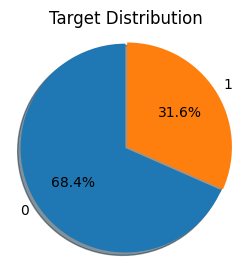

Any Unique records exist in PatientID Column: False


In [21]:
label_count=train_bbox_df['Target'].value_counts()
explode = (0.01,0.01)

fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Target Distribution')
plt.show()
print("Any Unique records exist in PatientID Column:" ,train_bbox_df['patientId'].is_unique)

In [22]:
duplicate = train_bbox_df[train_bbox_df.duplicated(['patientId'])]

print("Duplicate Rows based on PatientID :", duplicate.patientId.count())

# Print the resultant Dataframe
duplicate


Duplicate Rows based on PatientID : 3543


patientId      x      y  width  height  \
5      00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0   
9      00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0   
15     00aecb01-a116-45a2-956c-08d2fa55433f  547.0  299.0  119.0   165.0   
17     00c0b293-48e7-4e16-ac76-9269ba535a62  650.0  511.0  206.0   284.0   
20     00f08de1-517e-4652-a04f-d1dc9ee48593  571.0  275.0  230.0   476.0   
...                                     ...    ...    ...    ...     ...   
30209  c18d1138-ba74-4af5-af21-bdd4d2c96bb5  295.0  473.0  133.0   176.0   
30215  c1cddf32-b957-4753-acaa-472ab1447e86  766.0  475.0  135.0   213.0   
30220  c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2  316.0  504.0  179.0   273.0   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target  
5           1  
9           1  
15          1  
17          1  
20          1  
...       ...  
30209       1  
30215       1  
30220       1  
30222       1  
30226       1  

[3543 rows x 6 columns]

In [23]:
Class_labels=None;
if _environment=="colab":
    Class_labels = pd.read_csv('/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv')
elif _environment=="local":
    Class_labels = pd.read_csv(Class_dir);
else:
    print("Error: Wrong Environment");

print("Shape = " , Class_labels.shape);

Shape =  (30227, 2)


In [24]:
Class_labels.head()

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [25]:
Class_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [26]:
Class_labels['class'].value_counts()

class
No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: count, dtype: int64

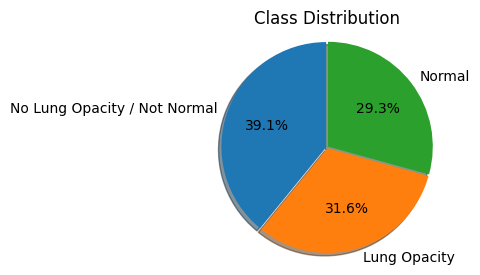

In [27]:
label_count=Class_labels['class'].value_counts()
explode = (0.01,0.01,0.01)

fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Class Distribution')
plt.show()

Each patientId corresponds to a unique image class as per below depending what is the current state of the patient's lung as per below,
- 'No Lung Opacity / Not Normal'
- 'Normal'
- 'Lung Opacity'.

In [28]:
def get_feature_distribution(data, feature):
  # Count for each label
  label_counts = data[feature].value_counts()
  # Count the number of items in each class
  total_samples = len(data)
  print("Feature: {}".format(feature))
  for i in range(len(label_counts)):
    label = label_counts.index[i]
    count = label_counts.values[i]
    percent = int((count / total_samples) * 10000) / 100
    print("{:<30s}: {} which is {}% of the total data in the dataset".format(label, count, percent))

In [29]:
get_feature_distribution(Class_labels, 'class')

Feature: class
No Lung Opacity / Not Normal  : 11821 which is 39.1% of the total data in the dataset
Lung Opacity                  : 9555 which is 31.61% of the total data in the dataset
Normal                        : 8851 which is 29.28% of the total data in the dataset


In [30]:
duplicateClassRowsDF = Class_labels[Class_labels.duplicated(['patientId'])]
duplicateClassRowsDF.shape
print('No of dulicate rows: ', duplicateClassRowsDF.shape[0])

No of dulicate rows:  3543


In [31]:
duplicateClassRowsDF.head(5)

patientId         class
5   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
9   00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
15  00aecb01-a116-45a2-956c-08d2fa55433f  Lung Opacity
17  00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity
20  00f08de1-517e-4652-a04f-d1dc9ee48593  Lung Opacity

In [32]:
Class_labels[Class_labels.patientId=='00c0b293-48e7-4e16-ac76-9269ba535a62']

patientId         class
16  00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity
17  00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity

In [33]:
#Step 3: Map training and testing images to its annotations.

# Load the bounding box annotations
#train_bbox_df = pd.read_csv("/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv")

# Create mappings for training images to bounding boxes
train_image_bbox_map = {}
for index, row in train_bbox_df.iterrows():
    patient_id = row['patientId']
    x_min = row['x']
    y_min = row['y']
    width = row['width']
    height = row['height']

    # Check for NaN values in bounding box coordinates
    if pd.isna(x_min) or pd.isna(y_min) or pd.isna(width) or pd.isna(height):
        continue  # Skip rows with missing bounding box information

    # Store the bounding box information as a tuple (x_min, y_min, width, height)
    if patient_id not in train_image_bbox_map:
        train_image_bbox_map[patient_id] = []
    train_image_bbox_map[patient_id].append((x_min, y_min, width, height))

# Example usage: Accessing bounding boxes for a particular image
# Print the first 5 patient IDs and their associated bounding boxes
for patient_id, bboxes in list(train_image_bbox_map.items())[:5]:
    print(f"Patient ID: {patient_id}, Bounding Boxes: {bboxes}")

# Note: Test images do not have corresponding bounding box annotations in the sample submission file
# Thus, there is no mapping to create for test images in this step.

Patient ID: 00436515-870c-4b36-a041-de91049b9ab4, Bounding Boxes: [(264.0, 152.0, 213.0, 379.0), (562.0, 152.0, 256.0, 453.0)]
Patient ID: 00704310-78a8-4b38-8475-49f4573b2dbb, Bounding Boxes: [(323.0, 577.0, 160.0, 104.0), (695.0, 575.0, 162.0, 137.0)]
Patient ID: 00aecb01-a116-45a2-956c-08d2fa55433f, Bounding Boxes: [(288.0, 322.0, 94.0, 135.0), (547.0, 299.0, 119.0, 165.0)]
Patient ID: 00c0b293-48e7-4e16-ac76-9269ba535a62, Bounding Boxes: [(306.0, 544.0, 168.0, 244.0), (650.0, 511.0, 206.0, 284.0)]
Patient ID: 00f08de1-517e-4652-a04f-d1dc9ee48593, Bounding Boxes: [(181.0, 184.0, 206.0, 506.0), (571.0, 275.0, 230.0, 476.0)]


In [34]:
train_df.head(5)

# Merging the Dataset - 'labels' and 'class_labels':
training_data = pd.concat([train_df, Class_labels['class']], axis = 1)

training_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity

Text(0.5, 1.0, 'Class and Target  Distrubution')

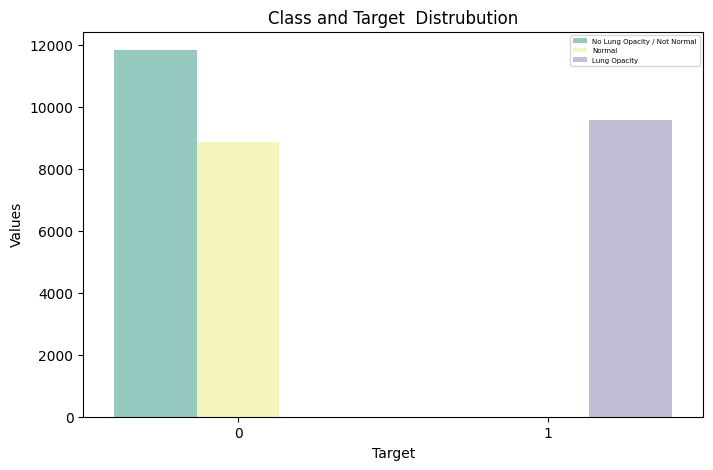

In [35]:
fig, ax = plt.subplots(nrows = 1, figsize = (8, 5))
temp = training_data.groupby('Target')['class'].value_counts()
data_target_class = pd.DataFrame(data = {'Values': temp.values}, index = temp.index).reset_index()
ax=sns.barplot(ax = ax, x = 'Target', y = 'Values', hue = 'class', data = data_target_class, palette = 'Set3')
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels
ax.legend(
    handles=handles, 
    labels=labels, 
    loc='upper right',  # Place legend in the top-right corner
    fontsize=5,         # Smaller font size
    frameon=True        # Add a frame to the legend
)
plt.title('Class and Target  Distrubution')

In [36]:
# Number of duplicates in patients:
print('Number of unique patientId are: {}'.format(Class_labels['patientId'].nunique()))

Number of unique patientId are: 26684


In [37]:
# import pydicom as dcm
# def inspectImages(data):
#     img_data = list(data.T.to_dict().values())
#     f, ax = plt.subplots(3,3, figsize=(16,18))
#     for i,data_row in enumerate(img_data):
#         patientImage = data_row['patientId']
#        # dcm_file = '/content/stage_2_train_images/'+'{}.dcm'.format(patientImage)
#         dcm_file = '/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/'+'{}.dcm'.format(patientImage)

#         # Use dcmread instead of read_file
#         data_row_img_data = dcm.dcmread(dcm_file)
#         modality = data_row_img_data.Modality
#         age = data_row_img_data.PatientAge
#         sex = data_row_img_data.PatientSex
#         data_row_img = dcm.dcmread(dcm_file)
#         ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
#         ax[i//3, i%3].axis('off')
#         ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\Bounds: {}:{}:{}:{}'.format(
#                 data_row['patientId'],
#                 modality, age, sex, data_row['Target'], data_row['class'],
#                 data_row['x'],data_row['y'],data_row['width'],data_row['height']))
#         label = data_row["class"]
#         if not math.isnan(data_row['x']):
#             x, y, width, height  =  data_row['x'],data_row['y'],data_row['width'],data_row['height']
#             rect = patches.Rectangle((x, y),width, height,
#                                  linewidth = 2,
#                                  edgecolor = 'r',
#                                  facecolor = 'none')

#         # Draw the bounding box on top of the image
#             ax[i//3, i%3].add_patch(rect)

#     plt.show()

# # Function to preprocess and visualize images
# def preprocess_and_visualize(image_path, target):
#     # Load DICOM image
#     ds = dcm.dcmread(image_path)
#     image = ds.pixel_array

#     # Normalize pixel values to [0, 1]
#     image = image / 255.0

#     # Display the image
#     plt.figure(figsize=(6, 6))
#     plt.imshow(image, cmap=plt.cm.gray)
#     plt.title(f"Image Class: {target}")
#     plt.axis('off')
#     plt.show()

# # Function to preprocess and visualize images
# def preprocess_and_visualize(image_path, target):
#     # Load DICOM image
#     ds = dcm.dcmread(image_path)
#     image = ds.pixel_array

#     # Normalize pixel values to [0, 1]
#     image = image / 255.0

#     # Display the image
#     plt.figure(figsize=(6, 6))
#     plt.imshow(image, cmap=plt.cm.gray)
#     plt.title(f"Image Class: {target}")
#     plt.axis('off')
#     plt.show()



In [38]:
# sample_patient_ids = list(train_image_class_map.keys())[:5]


# # Replace with the actual path to the images
# image_dir = "/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images"

# for patient_id in sample_patient_ids:
#     image_path = os.path.join(image_dir, f"{patient_id}.dcm")
#     if os.path.exists(image_path):
#         target = train_image_class_map[patient_id]
#         preprocess_and_visualize(image_path, target)
#     else:
#         print(f"Image not found for patient ID: {patient_id}")

In [39]:
#view images with target is 1
# inspectImages(training_data[training_data['Target']==1].sample(9))



In [40]:
#view images with target is 0
# inspectImages(training_data[training_data['Target']==0].sample(9))


In [41]:
#check duplicate and remove

one = training_data[training_data.Target == 1].drop_duplicates('patientId').shape[0]
zero = training_data[training_data.Target == 0].drop_duplicates('patientId').shape[0]
total = training_data.drop_duplicates('patientId').shape[0]

No of entries which has Pneumonia: 6012 i.e., 23.0%
No of entries which don't have Pneumonia: 20672 i.e., 1.0%


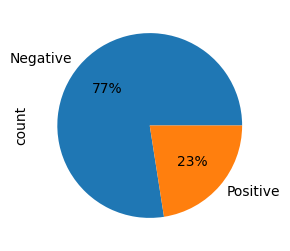

In [42]:
print(f'No of entries which has Pneumonia: {one} i.e., {round(one/total*100, 0)}%')
print(f'No of entries which don\'t have Pneumonia: {zero} i.e., {round(zero/total, 0)}%')
_ = training_data.drop_duplicates('patientId').drop_duplicates('patientId')['Target'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Negative', 'Positive'], figsize = (3, 3))

In [43]:
print('Number of nulls in bounding box columns: {}'.format(training_data[['x', 'y', 'width', 'height']].isnull().sum().to_dict()))

Number of nulls in bounding box columns: {'x': 20672, 'y': 20672, 'width': 20672, 'height': 20672}


In [44]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [45]:
bounding_box = training_data.groupby('patientId').size().to_frame('number_of_boxes').reset_index()
train_labels = training_data.merge(bounding_box, on = 'patientId', how = 'left')
print('Number of patientIds per bounding box in the dataset: ')
(bounding_box.groupby('number_of_boxes').size().to_frame('number_of_patientId').reset_index().set_index('number_of_boxes').sort_values(by = 'number_of_boxes'))

Number of patientIds per bounding box in the dataset: 


number_of_patientId
number_of_boxes                     
1                              23286
2                               3266
3                                119
4                                 13

Thus, there are 23286 unique patients which have only one entry in the dataset.

There are bounding boxs in the dataset are as per below,
- 3266 with 2 bounding box
- 119 with 3 bounding box  
- 13 with 4 bounding box coordinates.


In [46]:
# Merging the two dataset - 'train_labels' and 'class_labels':
training_data = pd.concat([train_labels], axis = 1)
print('After merging, the dataset looks like: \n')
training_data.head()

After merging, the dataset looks like: 



patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  number_of_boxes  
0  No Lung Opacity / Not Normal                1  
1  No Lung Opacity / Not Normal                1  
2  No Lung Opacity / Not Normal                1  
3                        Normal                1  
4                  Lung Opacity                2

In [47]:
print('After merge, the dataset has {} rows and {} columns.'.format(training_data.shape[0], training_data.shape[1]))

After merge, the dataset has 30227 rows and 8 columns.


In [48]:
import pydicom as dcm
data_row_img_data=[]
def inspectImages(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']
       # dcm_file = '/content/stage_2_train_images/'+'{}.dcm'.format(patientImage)
        if _environment=="colab":
            dcm_file = '/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/'+'{}.dcm'.format(patientImage)
        elif _environment=="local":
            dcm_file = "rsna-pneumonia-detection-challenge\\stage_2_train_images\\" + patientImage + ".dcm";
        else:
            dcm_file="";
            print("Error: Wrong Environment");

        # Use dcmread instead of read_file
        data_row_img_data = dcm.dcmread(dcm_file) ;
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(dcm_file)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\Bounds: {}:{}:{}:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'],
                data_row['x'],data_row['y'],data_row['width'],data_row['height']),
                               fontsize=5)
        label = data_row["class"]
        if not math.isnan(data_row['x']):
            x, y, width, height  =  data_row['x'],data_row['y'],data_row['width'],data_row['height']
            rect = patches.Rectangle((x, y),width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
            ax[i//3, i%3].add_patch(rect)

    plt.show()

# Function to preprocess and visualize images
def preprocess_and_visualize(image_path, target):
    # Load DICOM image
    ds = dcm.dcmread(image_path)
    image = ds.pixel_array

    # Normalize pixel values to [0, 1]
    image = image / 255.0

    # Display the image
    plt.figure(figsize=(2, 2))
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(f"Image Class: {target}")
    plt.axis('off')
    plt.show()

# Function to preprocess and visualize images
def preprocess_and_visualize(image_path, target):
    # Load DICOM image
    ds = dcm.dcmread(image_path)
    image = ds.pixel_array

    # Normalize pixel values to [0, 1]
    image = image / 255.0

    # Display the image
    plt.figure(figsize=(2, 2))
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(f"Image Class: {target}")
    plt.axis('off')
    plt.show()

def get_feature_distribution(data, feature):
  # Count for each label
  label_counts = data[feature].value_counts()
  # Count the number of items in each class
  total_samples = len(data)
  print("Feature: {}".format(feature))
  for i in range(len(label_counts)):
    label = label_counts.index[i]
    count = label_counts.values[i]
    percent = int((count / total_samples) * 10000) / 100
    print("{:<30s}: {} which is {}% of the total data in the dataset".format(label, count, percent))

def show_dicom_images(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(2,2, figsize=(2,2))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']
        if _environment=="colab":
            dcm_file = '/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/'+'{}.dcm'.format(patientImage)
        elif _environment=="local":
            dcm_file = "rsna-pneumonia-detection-challenge\\stage_2_train_images\\" + patientImage + ".dcm";
        else:
            print("Error: Wrong Environment");
        

        # Use dcmread instead of read_file
        data_row_img_data = dcm.dcmread(dcm_file)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(dcm_file)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nPart: {}\nViewPosition: {}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'],
                data_row_img_data.BodyPartExamined, data_row_img_data.ViewPosition))
        label = data_row["class"]
        if not math.isnan(data_row['x']):
            x, y, width, height  =  data_row['x'],data_row['y'],data_row['width'],data_row['height']
            rect = patches.Rectangle((x, y),width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
            ax[i//3, i%3].add_patch(rect)

    plt.show()


In [49]:
print("------------Diffrent Methods to read image data Read By------------");
#print("1. Tuple (Tuple of 2 integer):- Patient's Name = ", data_row[0][((0x0010,0x0010))].value);
#print("2. Access Methods:              Patient's Name = ", data_row[0].PatientName );
#print("3. Data Frame:                  Patient's Name = ", data_row.loc[0,"Patient's Name"]);

------------Diffrent Methods to read image data Read By------------


In [50]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:45:53.290147


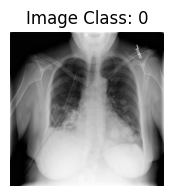

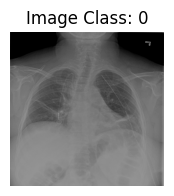

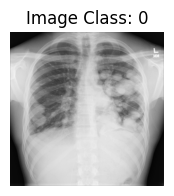

In [51]:
 #Step 5: Display images with bounding box. [ 5 points ]
sample_patient_ids = list(train_image_class_map.keys())[:3]
image_dir=""
if _environment=="colab":  
    image_dir = "/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images";
elif _environment=="local":
     image_dir = "rsna-pneumonia-detection-challenge\\stage_2_train_images";
else:
    print("Error: Wrong Environment");
    
for patient_id in sample_patient_ids:
    image_path = os.path.join(image_dir, f"{patient_id}.dcm")
    if os.path.exists(image_path):
        target = train_image_class_map[patient_id]
        preprocess_and_visualize(image_path, target)
    else:
        print(f"Image not found for patient ID: {patient_id}")

####  View images with target is 1

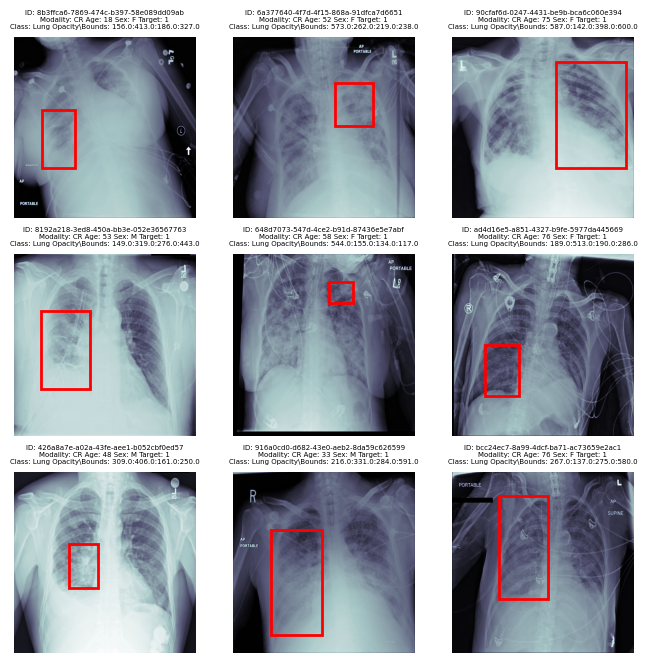

In [52]:
#view images with target is 1
inspectImages(training_data[training_data['Target']==1].sample(9))

#### View images with target is 0

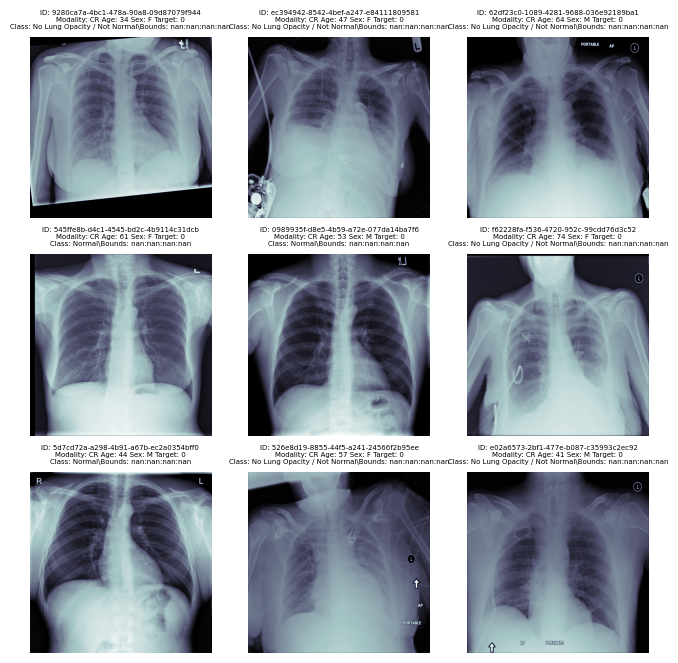

In [53]:
inspectImages(training_data[training_data['Target']==0].sample(9))

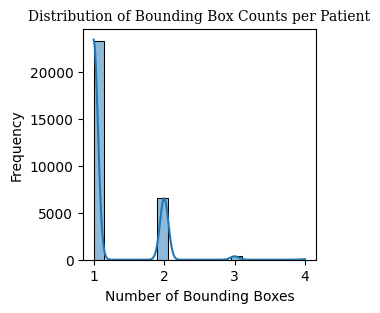

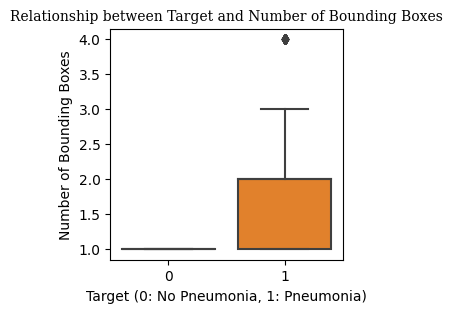

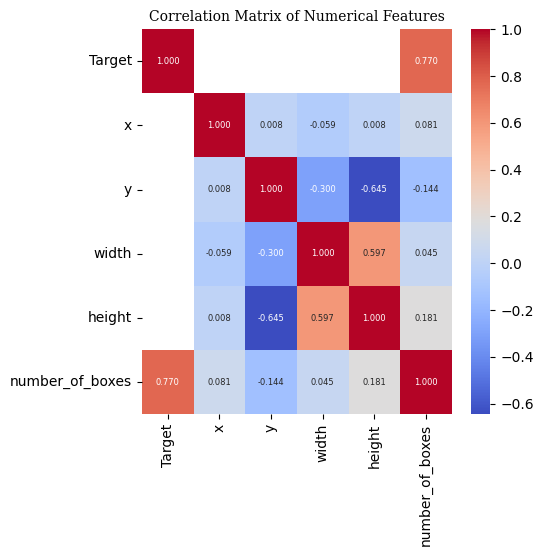

In [54]:

#Distribution of bounding box counts per patient
plt.figure(figsize=(3, 3))
sns.histplot(training_data['number_of_boxes'], bins=20, kde=True)
plt.title('Distribution of Bounding Box Counts per Patient', fontsize=10, fontfamily='serif')
plt.xlabel('Number of Bounding Boxes')
plt.ylabel('Frequency')
plt.show()

#Relationship between target and number of bounding boxes
plt.figure(figsize=(3, 3))
sns.boxplot(x='Target', y='number_of_boxes', data=training_data)
plt.title('Relationship between Target and Number of Bounding Boxes', fontsize=10, fontfamily='serif')
plt.xlabel('Target (0: No Pneumonia, 1: Pneumonia)')
plt.ylabel('Number of Bounding Boxes')
plt.show()

#Correlation matrix of numerical features
numerical_features = ['Target', 'x', 'y', 'width', 'height', 'number_of_boxes']
correlation_matrix = training_data[numerical_features].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f" , cmap='coolwarm', annot_kws={"size": 6})
plt.title('Correlation Matrix of Numerical Features', fontsize=10, fontfamily='serif')
plt.show()

In [55]:
#display Metadata of the image so the remaining information can be added to the dataset
sample_patientId = training_data['patientId'][0]
if _environment=="colab":
    dcm_file = '/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/'+'{}.dcm'.format(sample_patientId)
elif _environment=="local":
    dcm_file = "rsna-pneumonia-detection-challenge\\stage_2_train_images\\" + sample_patientId + ".dcm";
else:
    print("Error: Wrong Environment");


dcm_data = dcm.dcmread(dcm_file)

print('Metadata of the image consists of \n', dcm_data)

Metadata of the image consists of 
 Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 202
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008,0020) Study Date                          DA: '19010101'
(000


by looking at above sample we can see that dicom file contains some of the information that can be used for further analysis such as sex, age, body part examined, view position and modality.

Size of this image is 1024 x 1024 (rows x columns).

In [56]:
from glob import glob
if _environment=="colab":
    training_image_path = '/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/'
elif _environment=="local":
    training_image_path = "rsna-pneumonia-detection-challenge\\stage_2_train_images\\";
else:
    print("Error: Wrong Environment");

images = pd.DataFrame({'path': glob(os.path.join(training_image_path, '*.dcm'))})
images['patientId'] = images['path'].map(lambda x:os.path.splitext(os.path.basename(x))[0])
print('Columns in the training images dataframe: {}'.format(list(images.columns)))

Columns in the training images dataframe: ['path', 'patientId']


In [57]:
# Merging the images dataframe with training_data dataframe
training_data = training_data.merge(images, on = 'patientId', how = 'left')
print('After merging the two dataframe, the training_data has {} rows and {} columns.'.format(training_data.shape[0], training_data.shape[1]))

After merging the two dataframe, the training_data has 30227 rows and 9 columns.


In [58]:
#view final data
print('The training_data dataframe as of now stands like\n')
training_data.head()

The training_data dataframe as of now stands like



patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  number_of_boxes  \
0  No Lung Opacity / Not Normal                1   
1  No Lung Opacity / Not Normal                1   
2  No Lung Opacity / Not Normal                1   
3                        Normal                1   
4                  Lung Opacity                2   

                                                path  
0  rsna-pneumonia-detection-challenge\stage_2_tra...  
1  rsna-pneumonia-detection-challenge\stage_2_tra...  
2  rsna-pneumonia-detection-challenge\stage_2_tra...  
3  rsna-pneumonia-detection-challenge\stage_2_tra...  
4  rsna-pneumonia-detection-challenge\stage_2_tra...

In [59]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:45:56.493824


In [60]:
# use tqdm

from tqdm import tqdm

# Assuming 'training_data' and 'images' DataFrames are already defined as in your provided code.

metadata_cols = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']
metadata_df = pd.DataFrame(columns=metadata_cols)

#for index, row in tqdm(training_data.iterrows(), total=len(training_data)):
for index, row in tqdm(training_data.iterrows(), total=200):
    dcm_file = row['path']
    try:
        dcm_data = dcm.dcmread(dcm_file)
        metadata_row = {col: getattr(dcm_data, col, None) for col in metadata_cols}  # Handle potential missing attributes
        metadata_df = pd.concat([metadata_df, pd.DataFrame([metadata_row])], ignore_index=True)
    except Exception as e:
        print(f"Error processing {dcm_file}: {e}")
        # Handle errors appropriately (e.g., fill with NaN or skip the row)
        metadata_row = {col: None for col in metadata_cols}  # Fill with NaN for the problematic row
        metadata_df = pd.concat([metadata_df, pd.DataFrame([metadata_row])], ignore_index=True)


# Concatenate the metadata with the training data
training_data = pd.concat([training_data, metadata_df], axis=1)

30227it [02:25, 208.06it/s]                       


In [61]:
training_data

patientId      x      y  width  height  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN   
2      00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN   
4      00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   
...                                     ...    ...    ...    ...     ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba    NaN    NaN    NaN     NaN   
30224  c1f6b555-2eb1-4231-98f6-50a963976431    NaN    NaN    NaN     NaN   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target                         class  number_of_boxes  \
0           0  No Lung Opacity / Not Normal                1   
1           0  No Lung Opacity / Not Normal                1   
2           0  No Lung Opacity / Not Normal                1   
3           0                        Normal                1   
4           1                  Lung Opacity                2   
...       ...                           ...              ...   
30222       1                  Lung Opacity                2   
30223       0                        Normal                1   
30224       0                        Normal                1   
30225       1                  Lung Opacity                2   
30226       1                  Lung Opacity                2   

                                                    path Modality PatientAge  \
0      rsna-pneumonia-detection-challenge\stage_2_tra...       CR         51   
1      rsna-pneumonia-detection-challenge\stage_2_tra...       CR         48   
2      rsna-pneumonia-detection-challenge\stage_2_tra...       CR         19   
3      rsna-pneumonia-detection-challenge\stage_2_tra...       CR         28   
4      rsna-pneumonia-detection-challenge\stage_2_tra...       CR         32   
...                                                  ...      ...        ...   
30222  rsna-pneumonia-detection-challenge\stage_2_tra...       CR         54   
30223  rsna-pneumonia-detection-challenge\stage_2_tra...       CR         46   
30224  rsna-pneumonia-detection-challenge\stage_2_tra...       CR         45   
30225  rsna-pneumonia-detection-challenge\stage_2_tra...       CR         72   
30226  rsna-pneumonia-detection-challenge\stage_2_tra...       CR         72   

      PatientSex BodyPartExamined ViewPosition ConversionType  Rows Columns  \
0              F            CHEST           PA            WSD  1024    1024   
1              F            CHEST           PA            WSD  1024    1024   
2              M            CHEST           AP            WSD  1024    1024   
3              M            CHEST           PA            WSD  1024    1024   
4              F            CHEST           AP            WSD  1024    1024   
...          ...              ...          ...            ...   ...     ...   
30222          M            CHEST           AP            WSD  1024    1024   
30223          F            CHEST           PA            WSD  1024    1024   
30224          M            CHEST           PA            WSD  1024    1024   
30225          F            CHEST           AP            WSD  1024    1024   
30226          F            CHEST           AP            WSD  1024    1024   

                                     PixelSpacing  
0      [0.14300000000000002, 0.14300000000000002]  
1      [0.19431099999999998, 0.19431099999999998]  
2                                  [0.168, 0.168]  
3      [0.14300000000000002, 0.14300000000000002]  
4                                  [0.139, 0.139]  
...                                           ...  
30222                              [0.139, 0.139]  
30223  [0.1430000000000000

In [62]:
# Saving the training_data for further use:
training_data.to_pickle('training_data.pkl')

In [63]:
print('Modality for the images obtained is: {} \n'.format(training_data['Modality'].unique()[0]))

Modality for the images obtained is: CR 



In [64]:
#check and examine other added columns with differnt analysis

training_data.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target', 'class',
       'number_of_boxes', 'path', 'Modality', 'PatientAge', 'PatientSex',
       'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns',
       'PixelSpacing'],
      dtype='object')

In [65]:
get_feature_distribution(training_data.drop_duplicates('patientId'), 'PatientSex')

Feature: PatientSex
M                             : 15166 which is 56.83% of the total data in the dataset
F                             : 11518 which is 43.16% of the total data in the dataset


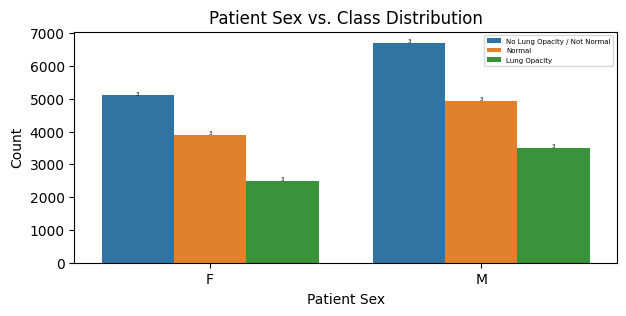

In [66]:
#Patient their sex wise class distribution
plt.figure(figsize=(7, 3))
ax=sns.countplot(x='PatientSex', hue='class', data=training_data.drop_duplicates('patientId'))
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels
ax.legend(
    handles=handles, 
    labels=labels, 
    loc='upper right',  # Place legend in the top-right corner
    fontsize=5,         # Smaller font size
    frameon=True        # Add a frame to the legend
)
plt.title('Patient Sex vs. Class Distribution')
plt.xlabel('Patient Sex')
plt.ylabel('Count')
# Annotate each bar with the count
for bar in ax.patches:
    count = bar.get_height()  # Height of the bar (the count)
    x = bar.get_x() + bar.get_width() / 2  # Center of the bar
    y = bar.get_height()  # Top of the bar
    ax.text(x, y + 0.1, f'{int(3)}', ha='center', fontsize=4)  # Add text annotation
plt.show()

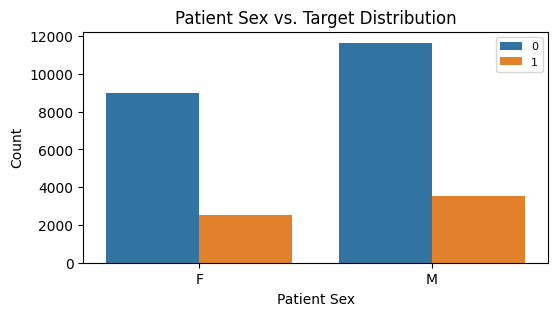

In [67]:
#patient their sex wise target distribution

plt.figure(figsize=(6, 3))
ax=sns.countplot(x='PatientSex', hue='Target', data=training_data.drop_duplicates('patientId'))
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels
ax.legend(
    handles=handles, 
    labels=labels, 
    loc='upper right',  # Place legend in the top-right corner
    fontsize=8,         # Smaller font size
    frameon=True        # Add a frame to the legend
)
plt.title('Patient Sex vs. Target Distribution')
plt.xlabel('Patient Sex')
plt.ylabel('Count')
plt.show()

Distribution of `PatientAge`: Overall and Target = 1


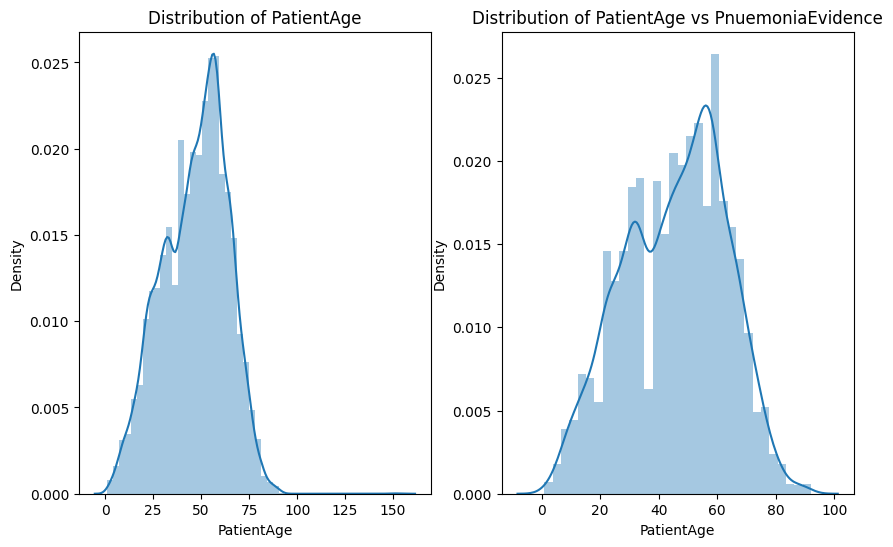

In [68]:
print('Distribution of `PatientAge`: Overall and Target = 1')
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(121)
g = (sns.distplot(training_data['PatientAge']).set_title('Distribution of PatientAge'))

ax = fig.add_subplot(122)
g = (sns.distplot(training_data.drop_duplicates('patientId').loc[training_data['Target'] == 1, 'PatientAge']).set_title('Distribution of PatientAge vs PnuemoniaEvidence'))

In [69]:
print('Check images obtained near {} areas.'.format(training_data['BodyPartExamined'].unique()[0]))

Check images obtained near CHEST areas.


In [70]:
get_feature_distribution(training_data.drop_duplicates('patientId'), 'ViewPosition')

Feature: ViewPosition
PA                            : 14511 which is 54.38% of the total data in the dataset
AP                            : 12173 which is 45.61% of the total data in the dataset


The `ViewPosition` attribute in the DICOM metadata describes the patient's position during the X-ray acquisition.  Common values include:

* **PA (Posteroanterior):**  X-ray beam enters the posterior (back) of the patient and exits the anterior (front). This is the standard view for chest X-rays.
* **AP (Anteroposterior):** X-ray beam enters the anterior (front) and exits the posterior (back).  Often used for patients who can't stand or when a portable X-ray machine is used.


 **Image Quality Assessment:** Different view positions might affect image quality and the visibility of certain lung regions.  Analyzing the distribution can reveal if certain views are under- or over-represented, potentially impacting model performance.

In summary, `ViewPosition` is a crucial piece of metadata that provides context about how the image was acquired and can potentially improve the analysis or modeling of the chest X-rays.


The distribution of View Position when there is an evidence of Pneumonia:



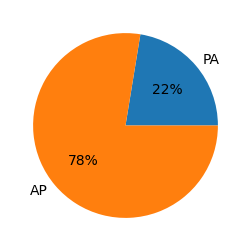

In [71]:
#Check AP and PA distribution where target=1 (phenumonia)

print('The distribution of View Position when there is an evidence of Pneumonia:\n')
plt.figure(figsize=(6, 3)) 
_ = training_data.drop_duplicates('patientId').loc[training_data['Target'] == 1, 'ViewPosition'].value_counts().sort_index(ascending = False).plot(kind = 'pie', autopct = '%.0f%%').set_ylabel('')

In [72]:
print('Conversion Type for the data in Training Data: ', training_data['ConversionType'].unique()[0])

Conversion Type for the data in Training Data:  WSD


In [73]:
print(f'The training images has {training_data.Rows.unique()[0]} rows and {training_data.Columns.unique()[0]} columns.')

The training images has 1024 rows and 1024 columns.


In [74]:
print('The minimum and maximum recorded age of the patients are {} and {} respectively.'.format(training_data['PatientAge'].min(), training_data['PatientAge'].max()))

The minimum and maximum recorded age of the patients are 1 and 92 respectively.


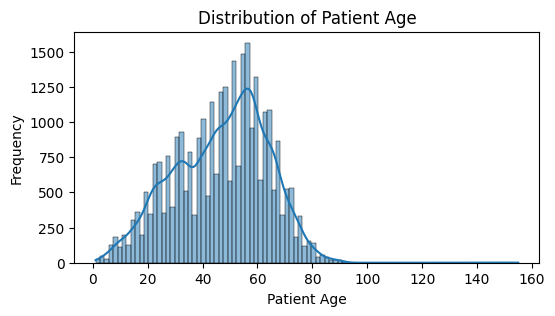

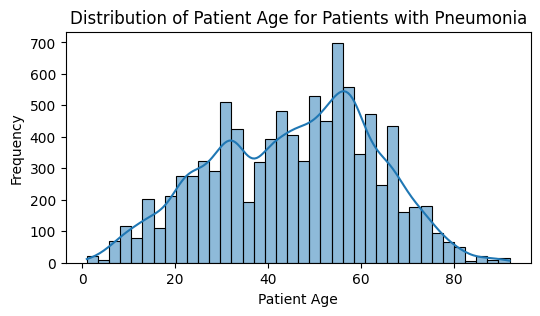

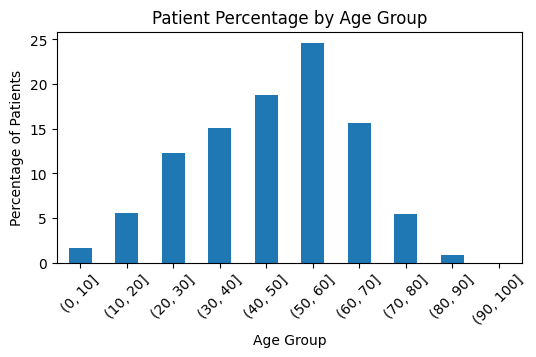

In [75]:

# Convert 'PatientAge' to numeric, handling errors
training_data['PatientAge'] = pd.to_numeric(training_data['PatientAge'], errors='coerce')

plt.figure(figsize=(6, 3))
sns.histplot(training_data['PatientAge'], kde=True)
plt.title('Distribution of Patient Age')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(training_data[training_data['Target'] == 1]['PatientAge'], kde=True)
plt.title('Distribution of Patient Age for Patients with Pneumonia')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.show()


# Calculate patient percentages by age group
age_groups = pd.cut(training_data['PatientAge'], bins=range(0, 101, 10))
age_percentages = training_data.groupby(age_groups)['patientId'].count() / len(training_data) * 100

#added agewise bins to dataset
training_data['PatientAgeBins'] = pd.cut(training_data['PatientAge'], bins=range(0, 101, 10))
training_data.drop_duplicates('patientId')['PatientAgeBins'].value_counts()

# Plot the patient percentages by age group
plt.figure(figsize=(6, 3))
age_percentages.plot(kind='bar')
plt.title('Patient Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Patients')
plt.xticks(rotation=45)
plt.show()

In [76]:
training_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  number_of_boxes  \
0  No Lung Opacity / Not Normal                1   
1  No Lung Opacity / Not Normal                1   
2  No Lung Opacity / Not Normal                1   
3                        Normal                1   
4                  Lung Opacity                2   

                                                path Modality  PatientAge  \
0  rsna-pneumonia-detection-challenge\stage_2_tra...       CR          51   
1  rsna-pneumonia-detection-challenge\stage_2_tra...       CR          48   
2  rsna-pneumonia-detection-challenge\stage_2_tra...       CR          19   
3  rsna-pneumonia-detection-challenge\stage_2_tra...       CR          28   
4  rsna-pneumonia-detection-challenge\stage_2_tra...       CR          32   

  PatientSex BodyPartExamined ViewPosition ConversionType  Rows Columns  \
0          F            CHEST           PA            WSD  1024    1024   
1          F            CHEST           PA            WSD  1024    1024   
2          M            CHEST           AP            WSD  1024    1024   
3          M            CHEST           PA            WSD  1024    1024   
4          F            CHEST           AP            WSD  1024    1024   

                                 PixelSpacing PatientAgeBins  
0  [0.14300000000000002, 0.14300000000000002]       (50, 60]  
1  [0.19431099999999998, 0.19431099999999998]       (40, 50]  
2                              [0.168, 0.168]       (10, 20]  
3  [0.14300000000000002, 0.14300000000000002]       (20, 30]  
4                              [0.139, 0.139]       (30, 40]

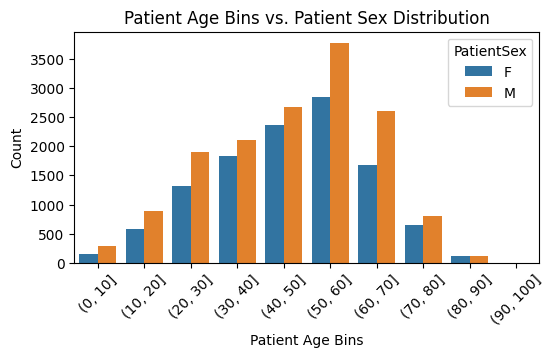

In [77]:

# Plot patient age bins vs patient sex
plt.figure(figsize=(6, 3))
sns.countplot(x='PatientAgeBins', hue='PatientSex', data=training_data.drop_duplicates('patientId'))
plt.title('Patient Age Bins vs. Patient Sex Distribution')
plt.xlabel('Patient Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

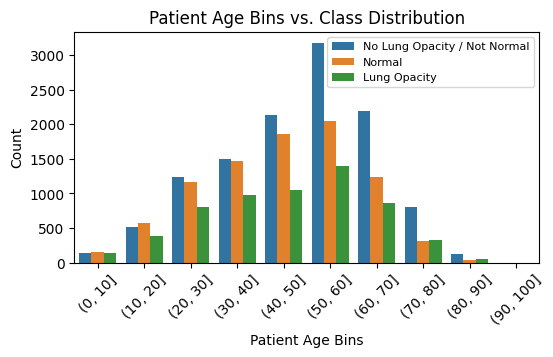

In [78]:
# Plot patient age bins, patient sex, and class
plt.figure(figsize=(6, 3))
ax=sns.countplot(x='PatientAgeBins', hue='class', data=training_data.drop_duplicates('patientId'))
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels
ax.legend(
    handles=handles, 
    labels=labels, 
    loc='upper right',  # Place legend in the top-right corner
    fontsize=8,         # Smaller font size
    frameon=True        # Add a frame to the legend
)

plt.title('Patient Age Bins vs. Class Distribution')
plt.xlabel('Patient Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [79]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:48:24.268611



**1. Class Imbalance:**

The pie chart shows a significant class imbalance, with a majority of patients being negative for pneumonia. This imbalance needs to be addressed during model training (e.g., using class weights or resampling techniques).

**2. Bounding Box Analysis:**
- The code shows that most patients have a single bounding box.
- A small percentage have multiple bounding boxes, indicating multiple pneumonia instances in a single image.
- The distribution plot of bounding boxes shows the frequency of patient's with different numbers of boxes.
- The box plot comparing the target variable and the number of bounding boxes helps visualize the relationship between the presence of pneumonia and the number of bounding boxes detected.

**3. Image Metadata Analysis:**
The code extracts various metadata fields (Modality, PatientAge, PatientSex, etc.) from DICOM files.

The analysis can be improved using this metadata:
- Patient Sex: Analyzing the relationship between patient sex and the presence or absence of pneumonia.
- Patient Age: Investigating the distribution of patient ages, identifying if certain age groups have a higher prevalence of pneumonia.
- The distributions of ages of all patients and patients with pneumonia are shown in separate histograms.
- Age bins were created, and counts of patients within those age bins were displayed.
- A bar chart displays the percentage of patients within each age group.
- Body Part Examined: Checking if all images are of the chest area.
- View Position: Analyzing the distribution of 'PA' and 'AP' views, potentially assessing if certain view positions might bias the model.
- A pie chart shows the distribution of view position for patients with pneumonia.
- Pixel Spacing and Image Size: Analyzing if there are inconsistencies in image dimensions or pixel spacing that could affect model performance.
- The code prints the row and column size of the images.
- Correlation Matrix: The correlation heatmap reveals relationships between numerical features, including 'Target', bounding box coordinates, and the number of bounding boxes.

**4. Data Visualization:**

- The code visualizes the sample images with bounding boxes overlaid.
- The visualizations are crucial for understanding how the model is performing.

**Summary**
1. class imbalance is present in the dataset.
2. The training dataset(both of the csv files and training image folder) contains information of 26684 patient (unique)
3. Most of the recorded patient don't have pneumonia(target-0)
4. some of the patients have more than one bounding box. The maximum being 4.
5. The classes "No Lung Opacity/Not Normal" and "Normal" is associated with the target = 0 whereas "Lung Opacity" belong to Target = 1.
6. The images are present in dicom format, from which information like patientAge, PatientSex, ViewPosition etc are obtained
7. There are two ways from which images were ontained AP and PA. The age ranges from 1- 92.


**Model Building**

In [80]:
#Step 6: Design, train and test basic CNN models for classification.

In [81]:
#import libraries

import numpy as np
import pickle
import matplotlib.pyplot  as plt
import cv2
import os
import tensorflow as tf
from tensorflow.keras.layers import (    Input,
    Conv2D,
    MaxPooling2D,
    UpSampling2D,
    Concatenate,
    Activation,
    Dropout,BatchNormalization,
    Reshape,ZeroPadding2D, Convolution2D, Flatten,Dense
)
import functools
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications import MobileNet #mobilenet architecture.
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import pandas as pd
import random

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence
import random

In [82]:
## take a 1000 images from the dataset for processing
model_trainigdata = training_data.groupby('class', group_keys=False).apply(lambda x: x.sample(10))

In [83]:
model_trainigdata["class"].value_counts()

class
Lung Opacity                    10
No Lung Opacity / Not Normal    10
Normal                          10
Name: count, dtype: int64

In [84]:
model_trainigdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1896 to 22094
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   patientId         30 non-null     object  
 1   x                 10 non-null     float64 
 2   y                 10 non-null     float64 
 3   width             10 non-null     float64 
 4   height            10 non-null     float64 
 5   Target            30 non-null     int64   
 6   class             30 non-null     object  
 7   number_of_boxes   30 non-null     int64   
 8   path              30 non-null     object  
 9   Modality          30 non-null     object  
 10  PatientAge        30 non-null     int64   
 11  PatientSex        30 non-null     object  
 12  BodyPartExamined  30 non-null     object  
 13  ViewPosition      30 non-null     object  
 14  ConversionType    30 non-null     object  
 15  Rows              30 non-null     object  
 16  Columns           30 non-nu

In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [86]:

images = []
ADJUSTED_IMAGE_SIZE = 128
imageList = []
classLabels = []
labels = []
originalImage = []
# Function to read the image from the path and reshape the image to size
def readAndReshapeImage(image):
    img = np.array(image).astype(np.uint8)
    ## Resize the image
    res = cv2.resize(img,(ADJUSTED_IMAGE_SIZE,ADJUSTED_IMAGE_SIZE), interpolation = cv2.INTER_LINEAR)
    return res

## Read the imahge and resize the image
def populateImage(rowData):
    for index, row in rowData.iterrows():
        patientId = row.patientId
        classlabel = row["class"]
        if _environment=="colab":
            dcm_file = '/content/drive/MyDrive/Vishal_Notebook/rsna-pneumonia-detection-challenge/stage_2_train_images/'+'{}.dcm'.format(patientId)
        elif _environment=="local":
            dcm_file = "rsna-pneumonia-detection-challenge\\stage_2_train_images\\" + patientId + ".dcm";
        else:
            print("Error: Wrong Environment");
        

        dcm_data = dcm.dcmread(dcm_file)
        img = dcm_data.pixel_array
        ## Converting the image to 3 channels as the dicom image pixel does not have colour classes wiht it
        if len(img.shape) != 3 or img.shape[2] != 3:
            img = np.stack((img,) * 3, -1)
        imageList.append(readAndReshapeImage(img))
#         originalImage.append(img)
        classLabels.append(classlabel)
    tmpImages = np.array(imageList)
    tmpLabels = np.array(classLabels)
#     originalImages = np.array(originalImage)
    return tmpImages,tmpLabels

# Function to create a dataframe for results
def createResultDf(name,accuracy,testscore):
    result = pd.DataFrame({'Method':[name], 'accuracy': [accuracy] ,'Test Score':[testscore]})
    return result

In [87]:
## Reading the images into numpy array
images,labels = populateImage(model_trainigdata)

In [88]:
#encoding the lablels
enc = LabelBinarizer()
y2 = enc.fit_transform(labels)

In [89]:
# splitting into train ,test and validation data

X_train, X_test, y_train, y_test = train_test_split(images, y2, test_size=0.3, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=50)

In [90]:
#Create basic vgg16 cnn model for classification.

def create_vgg16_model(input_shape, num_classes):
    model = Sequential()

    # 32 filters with 3x3 kernal and no padding
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # 64 filters with 3x3 kernal and no padding
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # # 128 filters with 3x3 kernal and no padding
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # # # 256 filters with 3x3 kernal and no padding
    # model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    # model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    # model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    # model.add(MaxPooling2D((2, 2), strides=(2, 2)))


    # Classification block
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model



In [91]:
# Model summary
input_shape = (128, 128, 3)  # Adjust input shape as needed
num_classes = 3  # Replace with the actual number of classes
vgg16_model = create_vgg16_model(input_shape, num_classes)

vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   134,221,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,302,435 (577.17 MB)

 Trainable params: 151,302,435 (577.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4286 - loss: 2.5656 - val_accuracy: 0.6000 - val_loss: 226.5393
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2857 - loss: 408.3769 - val_accuracy: 0.2000 - val_loss: 314.9739
Test Loss: 213.6516
Test Accuracy: 0.2500


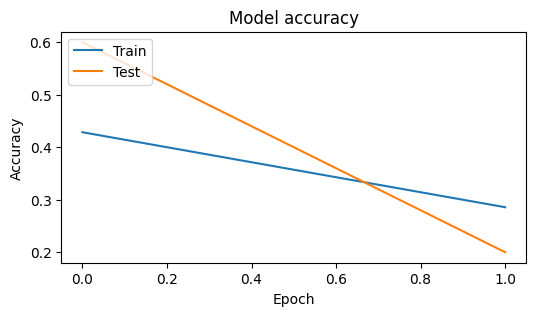

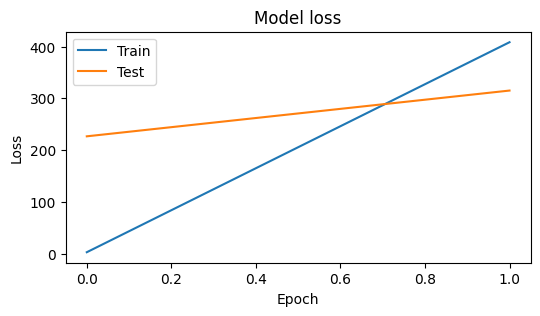

In [92]:
# Now Train the model

batch_size = 32  # Adjust the batch size as needed

history = vgg16_model.fit(
    X_train, y_train,
    epochs=EPOC_SIZE,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)

# Evaluate the model
loss, accuracy = vgg16_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

#Further analysis and model improvement can be done here.  Example below
#Plot training & validation accuracy values
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

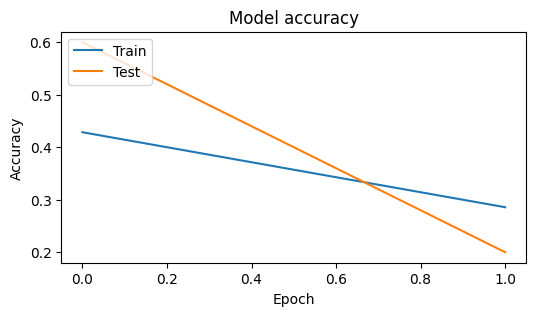

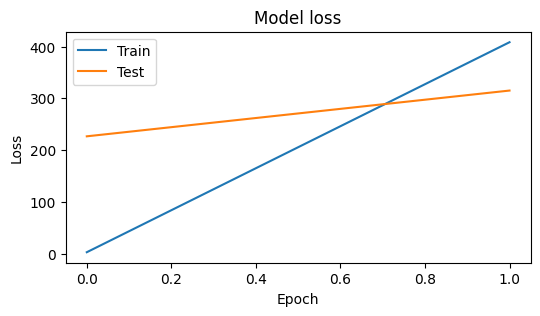

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


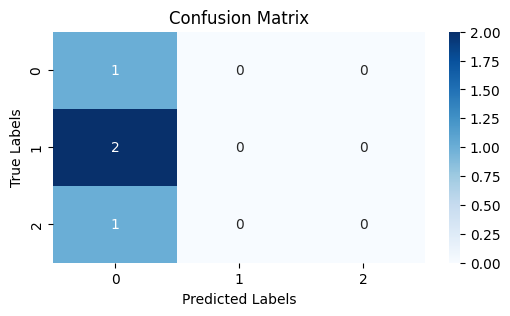

In [93]:

#Further analysis and model improvement can be done here. Example below
#Plot training & validation accuracy values
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Example: Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = vgg16_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Example:  Try different optimizers, learning rates, or model architectures
# Example: Add regularization (dropout, L1/L2) to prevent overfitting
# Example: Data augmentation to increase training data diversity

# Example of saving the trained model
vgg16_model.save("vgg16_pneumonia_model.h5")

# Example of loading the saved model:
# from tensorflow.keras.models import load_model
# loaded_model = load_model("vgg16_pneumonia_model.h5")


  Analysis of the provided code:

1. Data Loading and Preprocessing:
- The code loads data from DICOM files, merges it with metadata, and performs exploratory data analysis (EDA).
- Key preprocessing steps include:
         - Merging dataframes: Combines image metadata and patient information.
         - DICOM metadata extraction: Reads relevant metadata fields (Modality, PatientAge, PatientSex, etc.).  Handles missing values.
         - Data visualization: Generates various plots (distributions, histograms, count plots) to understand data characteristics.

  2. Exploratory Data Analysis (EDA):
     - The EDA section provides valuable insights into the dataset, including:
         - Class imbalance: Visualizes class distribution, revealing a significant imbalance between classes.
         - Patient demographics: Analyzes age, sex distributions, and their relationships to the target variable.
         - Image metadata: Examines various DICOM metadata like ViewPosition, BodyPartExamined, ConversionType, image size, etc.
     - Visualizations like histograms, countplots, pie charts, and bar charts are employed for comprehensive data understanding.


  3. Model Building (VGG16-like CNN):
     - A custom CNN model, inspired by VGG16, is created using Keras.
     - Architecture: The model consists of convolutional layers, max-pooling layers, flatten layer, dense layers, and a softmax output layer.
     - Compilation: The model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the metric.
     - Training: The model is trained for 30 epochs with a batch size of 32. Validation data is used for monitoring performance during training.
     - Evaluation: The trained model is evaluated on a separate test set using test loss and accuracy as metrics.

  4. Model Evaluation and Visualization:
     - Performance metrics: Presents test loss and accuracy.
     - Visualization: Displays training/validation accuracy and loss curves over epochs, providing insights into model learning trends.
     - Confusion matrix: Visualizes the model's predictions against true labels, showing performance for each class.

  5. Model Saving and Loading:
     - The trained model is saved to a file (vgg16_pneumonia_model.h5) for future use.
     - Code for loading the model is provided for convenience.


  Areas for Improvement:
  - Handling class imbalance: Strategies like oversampling, undersampling, or using class weights during training could improve performance.
  - Data augmentation: Applying random transformations to the training images can help the model generalize better and potentially reduce overfitting.
  - Hyperparameter tuning: Experiment with different optimizers, learning rates, batch sizes, and network architectures to optimize model performance.
  - Feature engineering: Extract additional features from DICOM files or images that may improve classification accuracy.
  - Model regularization: Add dropout or L1/L2 regularization to the model to mitigate potential overfitting.
  - More detailed error analysis: Examine misclassified images to understand why they are difficult for the model.
  - Experiment with different CNN architectures: Explore more advanced models or transfer learning techniques using pre-trained models.

In [94]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:48:33.325410


### 6.2 Import a Pretrained Model of  MobileNetV2

In [95]:
# Load pretrained model without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Add custom layers for pneumonia classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(128, activation='relu')(x)  # Fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

In [96]:
#Combine base model with custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [97]:
import pydicom as dcm
def populateImage_MobileNet(dicom_path, target_size):
    dicom = dcm.dcmread(dicom_path)   # Load DICOM file
    img = dicom.pixel_array   # Extract pixel array
    if img.dtype == np.float64:
        img = (img * 255 / img.max()).astype(np.uint8)  # Normalize
    img_resized = cv2.resize(img, target_size)     # Resize to target size
    if len(img_resized.shape) == 2:  # If single-channel
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)     # Convert single channel (grayscale) to 3 channels
    return img_resized

In [98]:
class DICOMDataGenerator(Sequence):
    #This method initializes the generator with required data and settings.
    def __init__(self, file_paths, labels, batch_size, target_size):
        self.file_paths = file_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_size = target_size

    #Returns the number of batches per epoch.
    def __len__(self):
        return int(np.ceil(len(self.file_paths) / self.batch_size))

    # Fetching a Batch - Loads and preprocesses a batch of DICOM images and their corresponding labels.
    def __getitem__(self, index):
        batch_paths = self.file_paths[index * self.batch_size:(index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size:(index + 1) * self.batch_size]

        images = []
        for path in batch_paths:
            img = populateImage_MobileNet(path, self.target_size)
            images.append(img)

        return np.array(images), np.array(batch_labels)

    #Shuffles the data at the end of each epoch to improve training randomness.
    def on_epoch_end(self):
        # Shuffle the data at the end of each epoch
        combined = list(zip(self.file_paths, self.labels))
        random.shuffle(combined)
        self.file_paths, self.labels = zip(*combined)

In [99]:
# Example: List of DICOM file paths and labels (0 for normal, 1 for pneumonia)
dicom_paths = model_trainigdata.head(100)['path'].tolist();
labels = model_trainigdata.head(100)['Target'].tolist();

# Split dataset
train_paths, val_paths, train_labels, val_labels = train_test_split(dicom_paths, labels, test_size=0.2, random_state=42)

# Create data generators
batch_size = 10
train_gen = DICOMDataGenerator(train_paths, train_labels, batch_size, IMG_SIZE)
val_gen = DICOMDataGenerator(val_paths, val_labels, batch_size, IMG_SIZE)



In [100]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOC_SIZE,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen)
)

Epoch 1/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 797ms/step - accuracy: 0.4375 - loss: 0.9462 - val_accuracy: 0.6667 - val_loss: 0.7082
Epoch 2/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [101]:
test_loss, test_accuracy = model.evaluate(val_gen)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.6667 - loss: 0.7082
Test Loss: 0.7081539034843445, Test Accuracy: 0.6666666865348816


In [102]:
for layer in base_model.layers:
    layer.trainable = True

# Compile with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Continue training
model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOC_SIZE,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen)
)

Epoch 1/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6220 - loss: 0.7280 - val_accuracy: 0.6667 - val_loss: 0.5838
Epoch 2/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [103]:
# ResNet clasification model

from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

# Load the ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers (optional, if you use pre-trained weights)
base_model.trainable = False

# Add custom classification layers on top
x = base_model.output
x = Flatten()(x)  # Flatten the feature maps
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
x = Dense(num_classes, activation='softmax')(x)  # Replace with the number of classes in your dataset

# Create the full model
resnet_model = Model(inputs=base_model.input, outputs=x)

# Compile the model
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
resnet_model.summary()


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 57,146,243 (218.00 MB)

 Trainable params: 33,558,531 (128.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [104]:
# Train the model
history = resnet_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOC_SIZE,
    batch_size=32
)

# Evaluate the model
loss, accuracy = resnet_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2857 - loss: 2.2709 - val_accuracy: 0.2000 - val_loss: 105.2741
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step - accuracy: 0.4286 - loss: 50.7263 - val_accuracy: 0.2000 - val_loss: 97.8949
Test Loss: 51.3630
Test Accuracy: 0.5000


In [105]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:49:12.067904


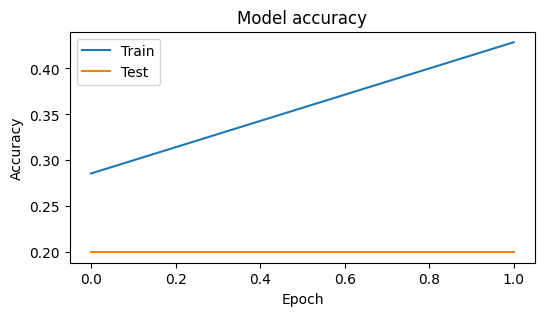

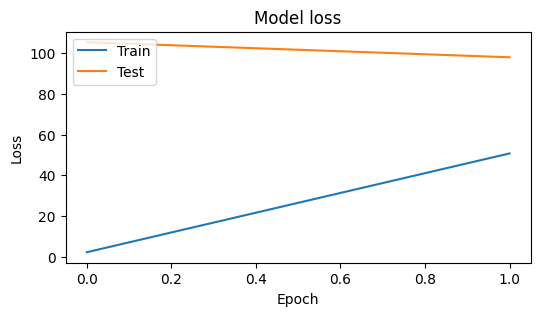

In [106]:
# Plot training & validation accuracy values
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Milestone 2: ##

**Input: Preprocessed output from Milestone-1**

**Process:**

Step 1: Fine tune the trained basic CNN models for classification.

In [107]:

# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import Sequence
# from sklearn.metrics import confusion_matrix
# import random


# Fine-tuning VGG16
# Unfreeze some layers of the VGG16 model for fine-tuning
for layer in vgg16_model.layers[:10]:  # unfreeze the first 10 layers
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
vgg16_model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model
history_finetuned_vgg16 = vgg16_model.fit(
    X_train, y_train,
    epochs=EPOC_SIZE,  # Adjust the number of epochs for fine-tuning
    batch_size=32,
    validation_data=(X_val, y_val)
)


# Fine-tuning MobileNetV2
# Unfreeze some layers of the MobileNetV2 model for fine-tuning
for layer in base_model.layers[-20:]: # unfreeze the last 20 layers
  layer.trainable = True

# Recompile the model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Continue training the model
history_finetuned_mobilenet = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOC_SIZE, # Adjust number of epochs
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen)
)


# Fine-tuning ResNet50
# Unfreeze some layers
base_model.trainable = True
for layer in base_model.layers[:100]: # unfreeze the first 100 layers
    layer.trainable = False

# Recompile the model with a lower learning rate
resnet_model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training
history_finetuned_resnet = resnet_model.fit(X_train, y_train,
                                        epochs=EPOC_SIZE, # Adjust number of epochs
                                        batch_size=32,
                                        validation_data=(X_val, y_val))


Epoch 1/2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3810 - loss: 201.0315WARNING:tensorflow:5 out of the last 10 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x000002B19C970400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3810 - loss: 201.0315 - val_accuracy: 0.2000 - val_loss: 300.0297
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3810 - loss: 189.0739 - val_accuracy: 0.2000 - val_loss: 285.8335
Epoch 1/2


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.9222 - loss: 0.3387WARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x000002B199687C40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 857ms/step - accuracy: 0.9208 - loss: 0.3398 - val_accuracy: 0.6667 - val_loss: 0.5877
Epoch 2/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.3810 - loss: 16.1461 - val_accuracy: 0.2000 - val_loss: 95.6787
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step - accuracy: 0.4762 - loss: 12.2999 - val_accuracy: 0.2000 - val_loss: 93.5383


Fine-tuned VGG16 - Test Loss: 190.5897, Test Accuracy: 0.2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6667 - loss: 0.5877
Fine-tuned MobileNetV2 - Test Loss: 0.5877, Test Accuracy: 0.6667
Fine-tuned ResNet50 - Test Loss: 47.5437, Test Accuracy: 0.5000

Model Comparison:
         Model   Test Loss  Test Accuracy
0        VGG16  190.589722       0.250000
1  MobileNetV2    0.587724       0.666667
2     ResNet50   47.543739       0.500000


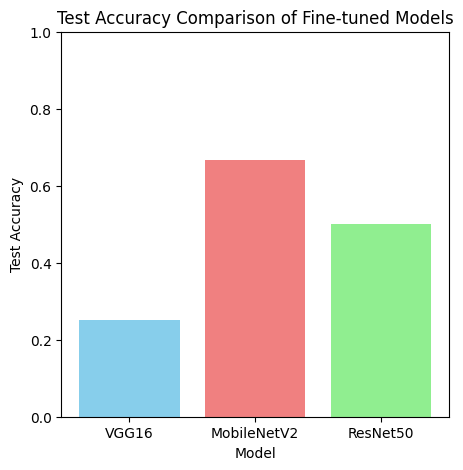

In [108]:
# Evaluate and compare the fine-tuned models

# Evaluate fine-tuned VGG16
loss_vgg16_ft, accuracy_vgg16_ft = vgg16_model.evaluate(X_test, y_test, verbose=0)
print(f"Fine-tuned VGG16 - Test Loss: {loss_vgg16_ft:.4f}, Test Accuracy: {accuracy_vgg16_ft:.4f}")

# Evaluate fine-tuned MobileNetV2
loss_mobilenet_ft, accuracy_mobilenet_ft = model.evaluate(val_gen)
print(f"Fine-tuned MobileNetV2 - Test Loss: {loss_mobilenet_ft:.4f}, Test Accuracy: {accuracy_mobilenet_ft:.4f}")

# Evaluate fine-tuned ResNet50
loss_resnet_ft, accuracy_resnet_ft = resnet_model.evaluate(X_test, y_test, verbose=0)
print(f"Fine-tuned ResNet50 - Test Loss: {loss_resnet_ft:.4f}, Test Accuracy: {accuracy_resnet_ft:.4f}")


# Create a summary table for easy comparison
model_names = ['VGG16', 'MobileNetV2', 'ResNet50']
test_losses = [loss_vgg16_ft, loss_mobilenet_ft, loss_resnet_ft]
test_accuracies = [accuracy_vgg16_ft, accuracy_mobilenet_ft, accuracy_resnet_ft]

comparison_df = pd.DataFrame({
    'Model': model_names,
    'Test Loss': test_losses,
    'Test Accuracy': test_accuracies
})

print("\nModel Comparison:")
print(comparison_df)


# Visualize the comparison (optional)
plt.figure(figsize=(5, 5))
plt.bar(comparison_df['Model'], comparison_df['Test Accuracy'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Test Accuracy Comparison of Fine-tuned Models')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1) # Set y-axis limit for better visualization
plt.show()

##### Step 2 : Apply Transfer Learning model for classiication

Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.3810 - loss: 188.8137 - val_accuracy: 0.2000 - val_loss: 284.4209
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3810 - loss: 171.1461 - val_accuracy: 0.2000 - val_loss: 283.0418
Epoch 1/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7381 - loss: 0.4698 - val_accuracy: 0.6667 - val_loss: 0.5942
Epoch 2/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.3810 - loss: 15.1175 - val_accuracy: 0.2000 - val_loss: 93.1973
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step - accuracy: 0.3810 - loss: 16.0447 - val_accuracy: 0.2000 - val_loss: 92.8680
Transfer Learning VGG16 - Test Loss: 188.3899, Test Accuracy: 0.2500
Transfer Learning MobileNetV2 - Test Loss: 0.5942, Test Accuracy: 0.6667
Transfer Learning ResNet50 - Test Loss: 47.3159, Test Accuracy: 0.5000

Transfer Learning Model Comparison:
         Model   Test Loss  Test

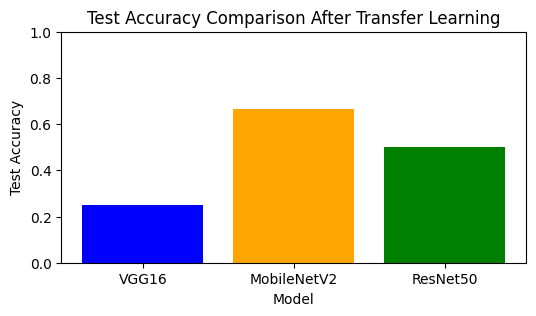

In [109]:
# Transfer Learning Approach

# Import necessary libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Common callbacks for all models
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Transfer Learning with VGG16
for layer in vgg16_model.layers[:15]:  # Unfreeze more layers for transfer learning
    layer.trainable = True

vgg16_model.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

history_vgg16_tl = vgg16_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOC_SIZE,
    batch_size=32,
    callbacks=[early_stopping, checkpoint]
)
# Transfer Learning with MobileNetV2
for layer in base_model.layers[-50:]:  # Unfreeze more layers for transfer learning
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-6), loss='binary_crossentropy', metrics=['accuracy'])

history_mobilenet_tl = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOC_SIZE,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen),
    callbacks=[early_stopping, checkpoint]
)

# Transfer Learning with ResNet50
for layer in base_model.layers[-100:]:  # Unfreeze more layers for transfer learning
    layer.trainable = True

resnet_model.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

history_resnet_tl = resnet_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOC_SIZE,
    batch_size=32,
    callbacks=[early_stopping, checkpoint]
)

# Evaluate Transfer Learning Performance
loss_vgg16_tl, accuracy_vgg16_tl = vgg16_model.evaluate(X_test, y_test, verbose=0)
loss_mobilenet_tl, accuracy_mobilenet_tl = model.evaluate(val_gen, verbose=0)
loss_resnet_tl, accuracy_resnet_tl = resnet_model.evaluate(X_test, y_test, verbose=0)

# Print improved results
print(f"Transfer Learning VGG16 - Test Loss: {loss_vgg16_tl:.4f}, Test Accuracy: {accuracy_vgg16_tl:.4f}")
print(f"Transfer Learning MobileNetV2 - Test Loss: {loss_mobilenet_tl:.4f}, Test Accuracy: {accuracy_mobilenet_tl:.4f}")
print(f"Transfer Learning ResNet50 - Test Loss: {loss_resnet_tl:.4f}, Test Accuracy: {accuracy_resnet_tl:.4f}")

# Create a summary table for comparison
comparison_tl_df = pd.DataFrame({
    'Model': ['VGG16', 'MobileNetV2', 'ResNet50'],
    'Test Loss': [loss_vgg16_tl, loss_mobilenet_tl, loss_resnet_tl],
    'Test Accuracy': [accuracy_vgg16_tl, accuracy_mobilenet_tl, accuracy_resnet_tl]
})

print("\nTransfer Learning Model Comparison:")
print(comparison_tl_df)

# Plot performance improvement
plt.figure(figsize=(6, 3))
plt.bar(comparison_tl_df['Model'], comparison_tl_df['Test Accuracy'], color=['blue', 'orange', 'green'])
plt.title('Test Accuracy Comparison After Transfer Learning')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)  # Adjust for clarity
plt.show()


In [110]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:50:58.233878


## Step 3: 
### 3.1 RCNN
### Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest. [ 8 points ]

## RCNN (Region-Based Convolutional Neural Network)

#### Load pre-trained CNN

In [111]:
df_Labels_Train = pd.read_csv(Label_dir)
df_Class_Train = pd.read_csv(Class_dir)
df_Class_Labels_Merged=pd.merge( df_Labels_Train, df_Class_Train,on='patientId')
df_Class_Labels_Merged_unique = df_Class_Labels_Merged.drop_duplicates(subset='patientId');

DF_RAW =df_Class_Labels_Merged_unique[df_Class_Labels_Merged_unique['Target'] == 1][:500]
DF_RAW.head(5)

patientId      x      y  width  height  Target  \
4   00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   
10  00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1   
18  00aecb01-a116-45a2-956c-08d2fa55433f  288.0  322.0   94.0   135.0       1   
22  00c0b293-48e7-4e16-ac76-9269ba535a62  306.0  544.0  168.0   244.0       1   
27  00f08de1-517e-4652-a04f-d1dc9ee48593  181.0  184.0  206.0   506.0       1   

           class  
4   Lung Opacity  
10  Lung Opacity  
18  Lung Opacity  
22  Lung Opacity  
27  Lung Opacity

In [112]:
class OpenImages:
    def __init__(self, df):
        self.root = Train_dicom_dir;
        if not isinstance(df, pd.DataFrame):
            raise TypeError("Expected a pandas DataFrame");     
        self.df = df;
        try:
            self.unique_images = df['patientId'].unique();
        except Exception as e:
            print(f"Error processing __init__ 1: {e}");
            
    def __len__(self): return len(self.unique_images);
    
    def __getitem__(self, ix):
        new_width, new_height = IMG_SIZE_RCNN;
        scale_x = 0;
        scale_y = 0;

        try:          
            image_id = self.unique_images[ix];
        except Exception as e:
            print(f"Error processing OpenImages 1: {e}");
            
        try:
            if _environment=="local":
                dcm_image_path=Train_dicom_dir + "\\" + image_id + ".dcm";
            else:
                dcm_image_path=Train_dicom_dir + "/" + image_id + ".dcm";    
            dicom_img = dcm.dcmread(dcm_image_path);   # Load DICOM file
            img = dicom_img.pixel_array ;  # Extract pixel array
            #print(img.shape);
            original_width, original_height =img.shape;         
            #print(original_width + ", " + original_height);
            scale_x = new_width / original_width;
            scale_y = new_height / original_height;

        except Exception as e:
            print(f"Error processing OpenImages # 2: {e}");            
      
        if img.dtype == np.float64:
            img = (img * 255 / img.max()).astype(np.uint8)  # Normalize
        img_resized = cv2.resize(img, IMG_SIZE_RCNN) ;    # Resize to target size
       
        if len(img_resized.shape) == 2:  # If single-channel
            img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)     # Convert single channel (grayscale) to 3 channels
  
        #image = cv2.imread(image_path, 1)[...,::-1] # convert BGR to RGB 
        # Basically x[...], it is similar to cv2.imread(image_path, 1)[:, :, ::-1], but this kinda works with any dimensions by mentioning just three dots
        #print("Resized image shape " , img_resized.shape);
        h, w,_= img_resized.shape;
        df = self.df.copy()
        df = df[df['patientId'] == image_id]
        #bbox = [df['x'],df['y'],df['width'],df['height']];
        #new_bbox = [        bbox[0] * scale_x,         bbox[1] * scale_y,         bbox[2] * scale_x,         bbox[3] * scale_y         ]
        boxes = df['x,y,width,height'.split(',')].values;
        boxes = (boxes * np.array([scale_x,scale_y,scale_x,scale_y])).astype(np.uint16).tolist() #boxes in accordance to the image
        classes = df['Target'].values.tolist();
        return img_resized, boxes, classes, dcm_image_path;

In [113]:
ds = OpenImages(DF_RAW);

Boundry Boxes= [[47, 145, 56, 70]]
Class of Image= [1]


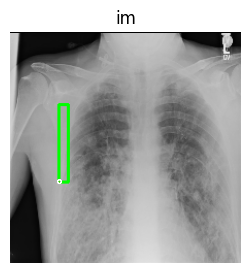

In [114]:
im, bbs, clss,_ = ds[15];
print("Boundry Boxes=" , bbs);
print("Class of Image=", clss);
#print("Image Data" , im);
show(im, bbs=bbs, texts=clss, sz=3);

### A mechanism to scan through the image to identify regions (region proposals) that are likely to contain objects. Here, we use selectivesearch (module) for it

In [115]:
def extract_candidates(img):
    #img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_lbl, regions = selectivesearch.selective_search(img, scale=10, min_size=30)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (1*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates

#how iou works
def extract_iou(boxA, boxB, epsilon=1e-5):
    x1 = max(boxA[0], boxB[0])
    y1 = max(boxA[1], boxB[1])
    x2 = min(boxA[2], boxB[2])
    y2 = min(boxA[3], boxB[3])
    width = (x2 - x1)  #change in x-direction
    height = (y2 - y1)  #change in y-direction
    if (width<0) or (height <0):
        return 0.0
    area_overlap = width * height # this was calculated by x1, y1, x2, y2
    area_a = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    area_b = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    area_combined = area_a + area_b - area_overlap
    iou = area_overlap / (area_combined+epsilon)
    return iou

### Display the Candidate of Bouding Box

(64, 4)
<class 'list'>


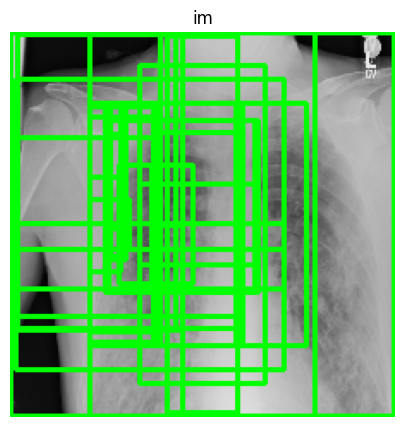

In [116]:
# Example of df[15]
candidates = extract_candidates(im)
print(np.shape(candidates))
print(type(candidates))
show(im, bbs = candidates,sz=5)

In [117]:
help(show);

Help on function show in module torch_snippets.loader:

show(img=None, ax=None, title=None, sz=None, bbs=None, confs=None, texts=None, bb_colors=None, cmap='gray', grid: bool = False, save_path: str = None, text_sz: int = None, df: pandas.core.frame.DataFrame = None, pts=None, conns=None, interactive: bool = False, jitter: int = None, frame_count: int = 1, **kwargs)
    show an image



### Creating the target class variable by using the IoU metric.

Best IoU: 0.0


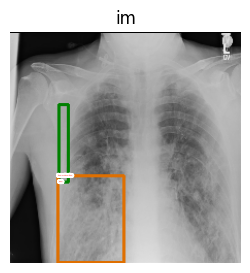

In [118]:
(im, bbs, labels, fpath) = ds[15]
H, W, _ = im.shape
candidates = extract_candidates(im)
candidates = np.array([(x,y,x+w,y+h) for x,y,w,h in candidates])  # candidates extracted are the x,y,w,h way and made x1, y1, x2, y2 to be similar to the bbs in the dataset

ious, rois, clss, deltas, best_ious = [], [], [], [], []
temp_best_bbs = []
ious = np.array([[extract_iou(candidate, _bb_) for candidate in candidates] for _bb_ in bbs]).T

for jx, candidate in enumerate(candidates):
    cx,cy,cX,cY = candidate
    candidate_ious = ious[jx]  #ious for that candidate
    best_iou_at = np.argmax(candidate_ious)  #best candidate iou is taken (index) ~ always be a zero index
    best_iou = candidate_ious[best_iou_at]   #gets the best score here
    best_ious.append(best_iou)
    best_bb = _x,_y,_X,_Y = bbs[best_iou_at] # gets the target label bounding box where there is the highest iou
    temp_best_bbs.append(best_bb)
    if best_iou > 0.3: clss.append(labels[best_iou_at]) # if iou is more than 0.3 it is not the background
    else : clss.append('background')
    delta = np.array([_x-cx, _y-cy, _X-cX, _Y-cY]) / np.array([W,H,W,H])  #normalizing the delta based on image size
    deltas.append(delta)
    rois.append(candidate / np.array([W,H,W,H]))

best_ious_at = np.argmax(best_ious)
print("Best IoU:", best_ious[best_ious_at])


best_candidate = candidates[best_ious_at]
best_bbs = temp_best_bbs[best_ious_at]

# Example of df[15]
candidates = extract_candidates(im)
show(im, bbs = [best_bbs, best_candidate], confs= [0,0.5],  texts = ['Bbox', 'Best candidate Bbox'],sz=3)

FPATHS: File paths, where image or data files are located.

GTBBS: Ground Truth Bounding Boxes

CLSS: Class labels 

DELTAS: Bounding box adjustments or offsets.

ROIS: Regions of Interest

IOUS: Intersection over Union scores, a metric to measure the overlap between predicted and ground truth bounding boxes.


### In above Image, Green is actual Bounding box and Orange is based on Ioc matrix from all candidate identified in previous images

In [119]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:51:00.992761


In [120]:
Use_Number_of_Images = 10;

In [121]:
FPATHS, GTBBS, CLSS, DELTAS, ROIS, IOUS = [], [], [], [], [], []
for ix, (im, bbs, labels, fpath) in enumerate(ds):
    if(ix==Use_Number_of_Images):
        break
    H, W, _ = im.shape
    candidates = extract_candidates(im)
    candidates = np.array([(x,y,x+w,y+h) for x,y,w,h in candidates])
    ious, rois, clss, deltas = [], [], [], []
    ious = np.array([[extract_iou(candidate, _bb_) for candidate in candidates] for _bb_ in bbs]).T
    for jx, candidate in enumerate(candidates):
        cx,cy,cX,cY = candidate
        candidate_ious = ious[jx]
        best_iou_at = np.argmax(candidate_ious)
        best_iou = candidate_ious[best_iou_at]
        best_bb = _x,_y,_X,_Y = bbs[best_iou_at]
        # if iou is more than 0.3 it is not the background
        if best_iou > 0.3: clss.append(labels[best_iou_at])
        else : clss.append('background')
        delta = np.array([_x-cx, _y-cy, _X-cX, _Y-cY]) / np.array([W,H,W,H])
        deltas.append(delta)
        rois.append(candidate / np.array([W,H,W,H]))
    FPATHS.append(fpath)
    IOUS.append(ious)
    ROIS.append(rois)
    CLSS.append(clss)
    DELTAS.append(deltas)
    GTBBS.append(bbs)
if _environment=="local":
    FPATHS = [f'{Train_dicom_dir}\\{stem(f)}.dcm' for f in FPATHS] 
else:
    FPATHS = [f'{Train_dicom_dir}/{stem(f)}.dcm' for f in FPATHS] 

#FPATHS, GTBBS, CLSS, DELTAS, ROIS = [item for item in [FPATHS, GTBBS, CLSS, DELTAS, ROIS]] #?
FPATHS, GTBBS, CLSS, DELTAS, ROIS ,IOUS= [item for item in [FPATHS, GTBBS, CLSS, DELTAS, ROIS, IOUS]] #?

In [122]:
print("\nFPATHS-File paths: ", FPATHS[1]);
print("\nGTBBS-Ground Truth Bounding Boxes: ", GTBBS[1]);
print("\nCLSS-Class labels of each candidate: ", CLSS[1][1]);
print("\nDELTAS-Bounding box adjustments or offsets: ", DELTAS[1][1]);
print("\nROIS-Regions of Interest: ", ROIS[1][1]);
print("\nIOUS-Intersection over Union scores: ", IOUS[1][1]);


FPATHS-File paths:  rsna-pneumonia-detection-challenge\stage_2_train_images\00704310-78a8-4b38-8475-49f4573b2dbb.dcm

GTBBS-Ground Truth Bounding Boxes:  [[70, 126, 35, 22]]

CLSS-Class labels of each candidate:  background

DELTAS-Bounding box adjustments or offsets:  [ 0.30357143  0.09821429 -0.02678571 -0.84821429]

ROIS-Regions of Interest:  [0.00892857 0.46428571 0.18303571 0.94642857]

IOUS-Intersection over Union scores:  [0.]


In [123]:
targets = pd.DataFrame(flatten(CLSS), columns=['Target'])
label2target = {l:t for t,l in enumerate(targets['Target'].unique())}
target2label = {t:l for l,t in label2target.items()}
background_class = label2target['background']

print("The label to target values dictionary formed is:" ,label2target)

The label to target values dictionary formed is: {'background': 0}


In [124]:
# normalizing with the mean, std used while training the model
# Define normalization parameters
mean = [0.485, 0.456, 0.406]  # Typical means for ImageNet
std = [0.229, 0.224, 0.225]   # Typical stds for ImageNet

#normalize = transforms.Normalize(mean=mean, std=std)
normalize = transforms.Normalize(mean=[0.5], std=[0.5])
def preprocess_image(img):
    img = torch.tensor(img).permute(2,0,1) # CHW: Channels, Height, Width
    #img = torch.tensor(img).unsqueeze(0)
    img = normalize(img)
    #img = torch.from_numpy(img).float()
    #img /= 255.0  # This scales pixel values from [0, 255] to [0, 1]
    return img.to(device).float();
def decode(_y):
    _, preds = _y.max(-1)
    return preds

In [125]:
class RCNNDataset:
    def __init__(self, fpaths, rois, labels, deltas, gtbbs):
        self.fpaths = fpaths
        self.gtbbs = gtbbs
        self.rois = rois
        self.labels = labels
        self.deltas = deltas
    def __len__(self): return len(self.fpaths)
    def __getitem__(self, ix):
        fpath = str(self.fpaths[ix])
        #VD Add
        #dcm_image_path=Train_dicom_dir + "\\" + image_id + ".dcm";
        dicom_img = dcm.dcmread(fpath);   # Load DICOM file
        #VD Option 1 Working
        #image = dicom_img.pixel_array ;  # Extract pixel array
        
        # Step 3: Normalize and convert to 8-bit (if needed)
        # (optional) Normalize to range [0, 255] for visualization if data is not in this range
        image_data = dicom_img.pixel_array ;  # Extract pixel array
        image_data = ((image_data - image_data.min()) / (image_data.max() - image_data.min()) * 255).astype(np.uint8)

        # Step 4: Convert grayscale to BGR if needed
        if len(image_data.shape) == 2:  # If grayscale
            image_data = cv2.cvtColor(image_data, cv2.COLOR_GRAY2BGR)

        # Step 5: Convert to BGR (OpenCV default format)
        image = image_data[..., ::-1]
            
        
        #image = cv2.imread(fpath, 1)[...,::-1]
        #H, W, _ = image.shape
        H, W, _ = image.shape
        #VD Add        
      
        sh = np.array([W,H,W,H])
        gtbbs = self.gtbbs[ix]
        rois = self.rois[ix]
        bbs = (np.array(rois)*sh).astype(np.uint16)
        labels = self.labels[ix]
        deltas = self.deltas[ix]
        crops = [image[y:Y,x:X] for (x,y,X,Y) in bbs]  # bounding box image crops
        return image, crops, bbs, labels, deltas, gtbbs, fpath
    def collate_fn(self, batch):
        '''Performing actions on a batch of images'''
        input, rois, rixs, labels, deltas = [], [], [], [], []
        for ix in range(len(batch)):
            image, crops, image_bbs, image_labels, image_deltas, image_gt_bbs, image_fpath = batch[ix]
            crops = [cv2.resize(crop, (224,224)) for crop in crops]
            crops = [preprocess_image(crop/255.)[None] for crop in crops]
            input.extend(crops)
            labels.extend([label2target[c] for c in image_labels])
            deltas.extend(image_deltas)
        input = torch.cat(input).to(device)
        labels = torch.Tensor(labels).long().to(device)
        deltas = torch.Tensor(deltas).float().to(device)
        return input, labels, deltas

In [126]:
# 70 : 30 Train test
n_train =7*len(FPATHS)//10 # 0.9 is the train size
#[:70%] start to 70%
print ("Total Files used=" ,len(FPATHS));
print ("Train count=" ,n_train);
n_train
train_ds = RCNNDataset(FPATHS[:n_train], ROIS[:n_train], CLSS[:n_train], DELTAS[:n_train], GTBBS[:n_train])
#[70%:]: 70% to End
test_ds = RCNNDataset(FPATHS[n_train:], ROIS[n_train:], CLSS[n_train:], DELTAS[n_train:], GTBBS[n_train:])

from torch.utils.data import TensorDataset, DataLoader
#train_loader = DataLoader(train_ds, batch_size=2, collate_fn=train_ds.collate_fn, drop_last=True)
#test_loader = DataLoader(test_ds, batch_size=2, collate_fn=test_ds.collate_fn, drop_last=True)
train_loader = DataLoader(train_ds, batch_size=2, collate_fn=train_ds.collate_fn, drop_last=True)
test_loader = DataLoader(test_ds, batch_size=2, collate_fn=test_ds.collate_fn, drop_last=True)

Total Files used= 10
Train count= 7


In [127]:
vgg_backbone = models.vgg16(pretrained=True)
vgg_backbone.classifier = nn.Sequential()
for param in vgg_backbone.parameters():
    param.requires_grad = False #not to do a re-train
vgg_backbone.eval().to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [128]:
class RCNN(nn.Module):
    def __init__(self):
        super().__init__()
        feature_dim = 25088
        self.backbone = vgg_backbone
        self.cls_score = nn.Linear(feature_dim, len(label2target))
        self.bbox = nn.Sequential(
              nn.Linear(feature_dim, 512),
              nn.ReLU(),
              nn.Linear(512, 4),
              nn.Tanh(),
            )
        self.cel = nn.CrossEntropyLoss() # loss for classification
        self.sl1 = nn.L1Loss() # loss for regression
    def forward(self, input):
        feat = self.backbone(input)  # both classification and regression takes 'feat' as input
        cls_score = self.cls_score(feat)
        bbox = self.bbox(feat)
        return cls_score, bbox
    def calc_loss(self, probs, _deltas, labels, deltas):
        # probs is basically the predicted class
        detection_loss = self.cel(probs, labels)
        ixs, = torch.where(labels != 1) #removing the label 1, which is background
        _deltas = _deltas[ixs]
        deltas = deltas[ixs]
        self.lmb = 10.0
        if len(ixs) > 0:
            regression_loss = self.sl1(_deltas, deltas)
            return detection_loss + self.lmb * regression_loss, detection_loss.detach(), regression_loss.detach()
        else:
            # every ix is detected as background
            regression_loss = 0
            return detection_loss + self.lmb * regression_loss, detection_loss.detach(), regression_loss

In [129]:
def train_batch(inputs, model, optimizer, criterion):
    input, clss, deltas = inputs
    model.train()
    optimizer.zero_grad()
    _clss, _deltas = model(input)  # as model outputs we will be getting classes and delta (bbox offsets)
    loss, loc_loss, regr_loss = criterion(_clss, _deltas, clss, deltas)
    accs = clss == decode(_clss)
    loss.backward()
    optimizer.step()
    return loss.detach(), loc_loss, regr_loss, accs.cpu().numpy()

In [130]:
@torch.no_grad()
def validate_batch(inputs, model, criterion):
    input, clss, deltas = inputs
    with torch.no_grad():
        model.eval()
        _clss,_deltas = model(input)
        loss, loc_loss, regr_loss = criterion(_clss, _deltas, clss, deltas)
        _, _clss = _clss.max(-1)  # more like a softmax np argmax
        accs = clss == _clss
    return _clss, _deltas, loss.detach(), loc_loss, regr_loss, accs.cpu().numpy()

###  RCNN Model

In [131]:
rcnn = RCNN().to(device)
criterion = rcnn.calc_loss
optimizer = optim.SGD(rcnn.parameters(), lr=1e-3)
n_epochs = 3

In [132]:
log = Report(n_epochs) #records the metrics as report, can be used to plot later

In [133]:
# loc_loss: loss on classification
# regr_loss: loss on regression

for epoch in range(n_epochs):

    _n = len(train_loader)
    for ix, inputs in enumerate(train_loader):
        loss, loc_loss, regr_loss, accs = train_batch(inputs, rcnn, optimizer, criterion)
        pos = (epoch + (ix+1)/_n)
        log.record(pos, trn_loss=loss.item(), trn_loc_loss=loc_loss, 
                   trn_regr_loss=regr_loss, 
                   trn_acc=accs.mean(), end='\r')
        
    _n = len(test_loader)
    for ix,inputs in enumerate(test_loader):
        _clss, _deltas, loss, \
        loc_loss, regr_loss, accs = validate_batch(inputs, 
                                                rcnn, criterion)
        pos = (epoch + (ix+1)/_n)
        log.record(pos, val_loss=loss.item(), val_loc_loss=loc_loss, 
                val_regr_loss=regr_loss, 
                val_acc=accs.mean(), end='\r')

# Plotting training and validation metrics

EPOCH: 3.000  val_loss: 1.960  val_loc_loss: 0.000  val_regr_loss: 0.196  val_acc: 1.000  (175.53s - 0.00s remaining))

###### Training V/s Validation loss

trn_loss : Training Loss computed on the training dataset after a forward pass and backward pass during each epoch

val_loss : Validation Loss computed on a separate validation dataset that is not used for updating model weights.

100%|██████████| 104/104 [00:00<00:00, 103858.96it/s]


[12/15/24 15:54:05] INFO     metric val_loss was not fully recorded. Plotting final epochs using last recorded value                         ]8;id=83478;file://C:\Users\vivek\AppData\Roaming\Python\Python311\site-packages\torch_snippets\torch_loader.py:733\torch_loader.py]8;;\:]8;id=510958;file://C:\Users\vivek\AppData\Roaming\Python\Python311\site-packages\torch_snippets\torch_loader.py:733#plot_epochs:733\plot_epochs:733]8;;\

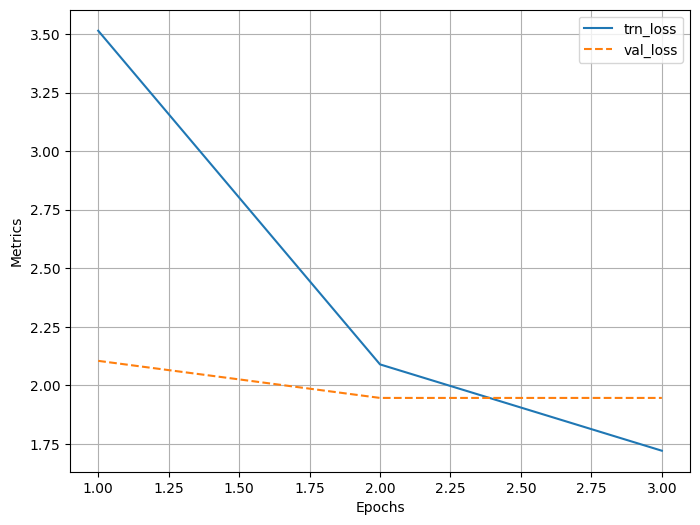

In [134]:
log.plot_epochs('trn_loss,val_loss'.split(','));

###### Training V/s Validation Accuracy 

trn_acc : Training Accuracy is percentage of correct predictions made by the model on the training dataset.


val_acc : Validation Accuracy is he percentage of correct predictions made by the model on the validation dataset, which is separate from the training dataset.

100%|██████████| 104/104 [00:00<00:00, 103933.19it/s]


                    INFO     metric val_acc was not fully recorded. Plotting final epochs using last recorded value                          ]8;id=360128;file://C:\Users\vivek\AppData\Roaming\Python\Python311\site-packages\torch_snippets\torch_loader.py:733\torch_loader.py]8;;\:]8;id=80032;file://C:\Users\vivek\AppData\Roaming\Python\Python311\site-packages\torch_snippets\torch_loader.py:733#plot_epochs:733\plot_epochs:733]8;;\

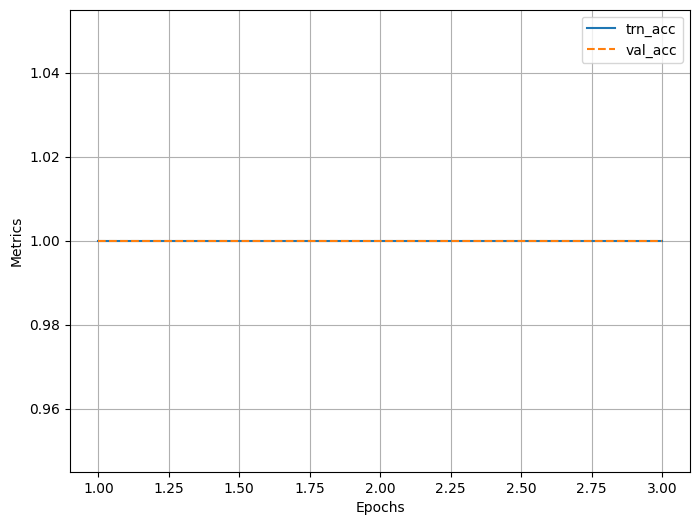

In [135]:
log.plot_epochs('trn_acc,val_acc'.split(','));

### NMS (Non-max suppression)
Non-max refers to the boxes that do not contain the highest probability of containing an object, and suppression refers to us discarding those boxes that do not contain the highest probabilities of containing an object. In non-max suppression, we identify the bounding box that has the highest probability and discard all the other bounding boxes that have an IoU greater than a certain threshold with the box containing the highest probability of containing an object.

Using non-max suppression nms to eliminate near-duplicate bounding boxes: pairs of boxes that have an IoU greater than 0.05 are considered duplicates in this case. Among the duplicated boxes, we pick that box with the highest confidence and discard the rest

In [136]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:54:05.880904


In [137]:
def test_predictions(filename, show_output=True):
    img_resized=0;
    dicom_img = dcm.dcmread(fpath);   # Load DICOM file
    #VD Option 1 Working
    #img_temp = dicom_img.pixel_array ;  # Extract pixel array    
    #if img_temp.dtype == np.float64:
    #    img_temp = (img_temp * 255 / img_temp.max()).astype(np.uint8)  # Normalize
    #    img_temp = cv2.resize(img_temp, IMG_SIZE_RCNN) ;    # Resize to target size
    #if len(img_temp.shape) == 2:  # If single-channel
    #    img_temp = cv2.cvtColor(img_temp, cv2.COLOR_GRAY2RGB)     # Conver
    #img=img_temp;
    #VD option 1 end
    
    image_data = dicom_img.pixel_array;

    # Step 3: Normalize and convert to 8-bit (if needed)
    # (optional) Normalize to range [0, 255] for visualization if data is not in this range
    image_data = ((image_data - image_data.min()) / (image_data.max() - image_data.min()) * 255).astype(np.uint8)

    # Step 4: Convert grayscale to BGR if needed
    if len(image_data.shape) == 2:  # If grayscale
        image_data = cv2.cvtColor(image_data, cv2.COLOR_GRAY2BGR)

    # Step 5: Convert to BGR (OpenCV default format)
    img = image_data[..., ::-1]
    
    
    #img = np.array(cv2.imread(filename, 1)[...,::-1])
    candidates = extract_candidates(img)
    candidates = [(x,y,x+w,y+h) for x,y,w,h in candidates]
    input = []
    for candidate in candidates:
        x,y,X,Y = candidate
        crop = cv2.resize(img[y:Y,x:X], (224,224))
        input.append(preprocess_image(crop/255.)[None])
    input = torch.cat(input).to(device)  #Concatenates the given sequence of seq tensors in the given dimension
    with torch.no_grad():
        rcnn.eval()
        probs, deltas = rcnn(input)
        print("Shape of probs", np.shape(probs))
        print("Shape of deltas", np.shape(deltas))
        probs = torch.nn.functional.softmax(probs, -1)  # probability is put between 0 and 1 by doing a softmax
        confs, clss = torch.max(probs, -1) #-1 is the dimension in which the max (reduction) must happen -> confs tells me the confidence and clss tells me the class where it has found the max probs
        print("Shape of confs", np.shape(confs))
        print("Shape of clss", np.shape(clss))
    candidates = np.array(candidates)
    confs, clss, probs, deltas = [tensor.detach().cpu().numpy() for tensor in [confs, clss, probs, deltas]]

    ixs = clss!=background_class
    confs, clss, probs, deltas, candidates = [tensor[ixs] for tensor in [confs, clss, probs, deltas, candidates]]
    bbs = (candidates + deltas).astype(np.uint16)
    ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(confs), 0.05)
    confs, clss, probs, deltas, candidates, bbs = [tensor[ixs] for tensor in [confs, clss, probs, deltas, candidates, bbs]]
    if len(ixs) == 1:
        # condition that even after nms, many ixs come for the bbox
        confs, clss, probs, deltas, candidates, bbs = [tensor[None] for tensor in [confs, clss, probs, deltas, candidates, bbs]]
    if len(confs) == 0 and not show_output:
        return (0,0,224,224), 'background', 0
    if len(confs) > 0:
        best_pred = np.argmax(confs)  # index
        best_conf = np.max(confs)
        best_bb = bbs[best_pred]
        x,y,X,Y = best_bb
    _, ax = plt.subplots(1, 2, figsize=(5,5))
    show(img, ax=ax[0])
    ax[0].grid(False)
    ax[0].set_title('Original image')
    if len(confs) == 0:
        ax[1].imshow(img)
        ax[1].set_title('No objects')
        plt.show()
        return
    ax[1].set_title('Predicted object: ' + target2label[clss[best_pred]])
    show(img, bbs=bbs.tolist(), texts=[target2label[c] for c in clss.tolist()], ax=ax[1])
    plt.show()
    return (x,y,X,Y),target2label[clss[best_pred]],best_conf

Shape of probs torch.Size([365, 1])
Shape of deltas torch.Size([365, 4])
Shape of confs torch.Size([365])
Shape of clss torch.Size([365])


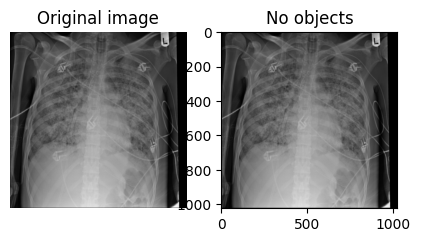

In [138]:
image, crops, bbs, labels, deltas, gtbbs, fpath = test_ds[1]
test_predictions(fpath)

### Due to few sample iamges our records are not showing bounding box, however if we use full dataset it will dispaly the correct bounding bozxes.

RCNN Modle Pickel

In [139]:
torch.save(rcnn, 'rcnn_model.pth')

Now as requested in Project, we will try Hybrid RCNN, We are going to use Faster RCNN

In [140]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:56:23.470242


## Step 3: 
### 3.2 Hybrid (Faster RCNN)
### Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest. [ 8 points ]

#### Using 20 images for Faster RCCN in _20 folder


In [141]:
seed = 42
num_classes = 2
batch_size = 2
train_img_size = 256 
origin_img_size = 1024
scale_factor = train_img_size / origin_img_size
np.random.seed(seed)
rcnn_losses = ["loss_objectness", "loss_box_reg", "loss_rpn_box_reg"]

In [142]:
if _environment=="local":
    TRAIN_DIR = "stage_2_train_images_20"
    TEST_DIR = "stage_2_test_images_20"
    ROOT_DIR = "rsna-pneumonia-detection-challenge"
    LABELS_FILE = "stage_2_train_labels_20.csv"
    SUBMISSION_FILE = "stage_2_train_labels_20.csv" # stage_2_sample_submission.csv"
if _environment=="colab":
    TRAIN_DIR = "stage_2_train_images_20"
    TEST_DIR = "stage_2_test_images_20"
    ROOT_DIR = "rsna-pneumonia-detection-challenge"
    LABELS_FILE = "stage_2_train_labels_20.csv"
    SUBMISSION_FILE = "stage_2_train_labels_20.csv" # stage_2_sample_submission.csv"

#####  Let's split our training dataset into training and validation sets. We leave a third of training samples for validation.

In [143]:
train_imgs = os.listdir(os.path.join(ROOT_DIR, TRAIN_DIR))
test_imgs =  [patienId + ".dcm" for patienId in pd.read_csv(os.path.join(ROOT_DIR, SUBMISSION_FILE)).patientId]

In [144]:
from sklearn.model_selection import train_test_split

train_imgs, valid_imgs = train_test_split(train_imgs, test_size=0.33, random_state=seed)

print(f"Number of training samples: {len(train_imgs)}")
print(f"Number of validation samples: {len(valid_imgs)}")

Number of training samples: 14
Number of validation samples: 8


##### Reading the file with 20 records and correspondig folder with 20 images only  and o

In [145]:
train_label_df = pd.read_csv(os.path.join(ROOT_DIR, LABELS_FILE))
train_label_df=train_label_df[0:100]
train_label_df.head()

patientId    x    y  width  height  Target
0  00436515-870c-4b36-a041-de91049b9ab4  264  152    213     379       1
1  00704310-78a8-4b38-8475-49f4573b2dbb  323  577    160     104       1
2  00aecb01-a116-45a2-956c-08d2fa55433f  288  322     94     135       1
3  00c0b293-48e7-4e16-ac76-9269ba535a62  306  544    168     244       1
4  00f08de1-517e-4652-a04f-d1dc9ee48593  181  184    206     506       1

Our model require box coordinates in format X0, X1. We also multiply bounding box coordinates with scale_factor since we will train our model on images of size 256 instead of their original size 1024. R-CNN also require area of bounding box as input.

In [146]:
isna_count = len(train_label_df[train_label_df.Target == 0]) # number of images without bounding box
train_label_df = train_label_df[train_label_df.Target == 1]
train_label_df.rename(columns={"x": "X0", "y": "Y0"}, inplace=True)
train_label_df["X1"] = train_label_df["X0"] + train_label_df["width"]
train_label_df["Y1"] = train_label_df["Y0"] + train_label_df["height"]
train_label_df[["X0", "X1", "Y0", "Y1"]] = train_label_df[["X0", "X1", "Y0", "Y1"]] * scale_factor
train_label_df["area"] = train_label_df["width"] * scale_factor * train_label_df["height"] * scale_factor
train_label_df.drop(["width", "height"], axis=1, inplace=True)
train_label_df.head()

patientId     X0      Y0  Target      X1  \
0  00436515-870c-4b36-a041-de91049b9ab4  66.00   38.00       1  119.25   
1  00704310-78a8-4b38-8475-49f4573b2dbb  80.75  144.25       1  120.75   
2  00aecb01-a116-45a2-956c-08d2fa55433f  72.00   80.50       1   95.50   
3  00c0b293-48e7-4e16-ac76-9269ba535a62  76.50  136.00       1  118.50   
4  00f08de1-517e-4652-a04f-d1dc9ee48593  45.25   46.00       1   96.75   

       Y1       area  
0  132.75  5045.4375  
1  170.25  1040.0000  
2  114.25   793.1250  
3  197.00  2562.0000  
4  172.50  6514.7500

Now let´s verify that we have images with Target  1 and 1 boundig box only, as we are using manual 20 unique files, in complete data set few records are repearing and has more that one bounding boxes.

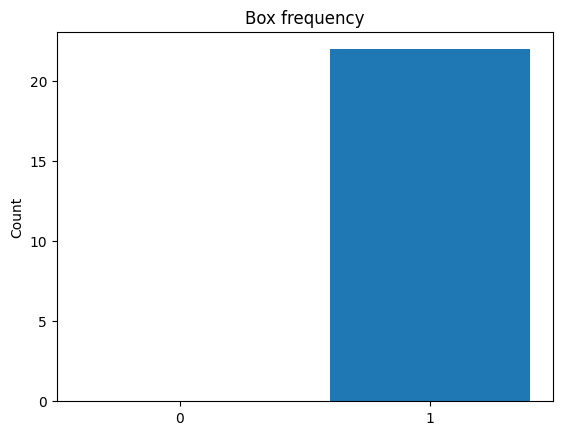

In [147]:
from collections import Counter

cnt = Counter(train_label_df.patientId)
sample_batch = [sample[0] + ".dcm" for sample in cnt.most_common(2)] # We will take two imgs with 4 boxes to display
counts = pd.Series(cnt.values()).value_counts()
counts[0] = isna_count
plt.title("Box frequency")
plt.ylabel("Count")
plt.xticks(counts.index)
plt.bar(counts.index, counts)
plt.show()
del cnt

In [148]:
counts.sort_values(ascending=False)

1    22
0     0
Name: count, dtype: int64

Although we are using sample of 20 images, in full set, We see that most of images do not have any bounding box. There is also a handful of images with three and four bounding boxes. Previously we calculated bounding boxes area so we can now disply area distribution.

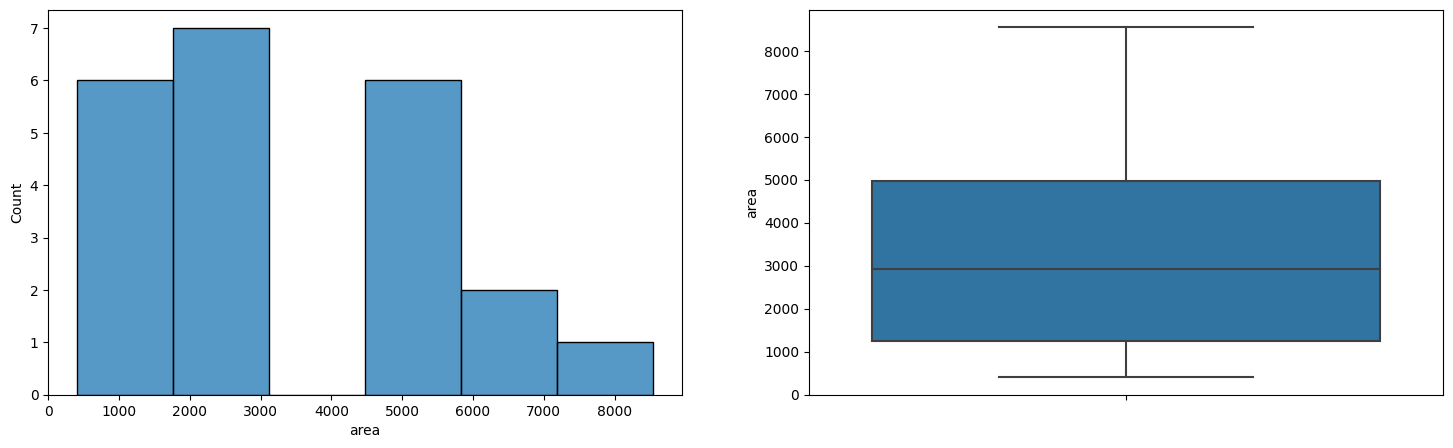

In [149]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.histplot(data=train_label_df, x="area", ax=axs[0])
sns.boxplot(y=train_label_df["area"])
plt.show()

Althogh we are using sample of 20 images, in full set, We see that most of boxes have area smaller than 7000. There are also outliers with area greater than 15000. Now we will define some helper functions to display samples batch along with boxes.

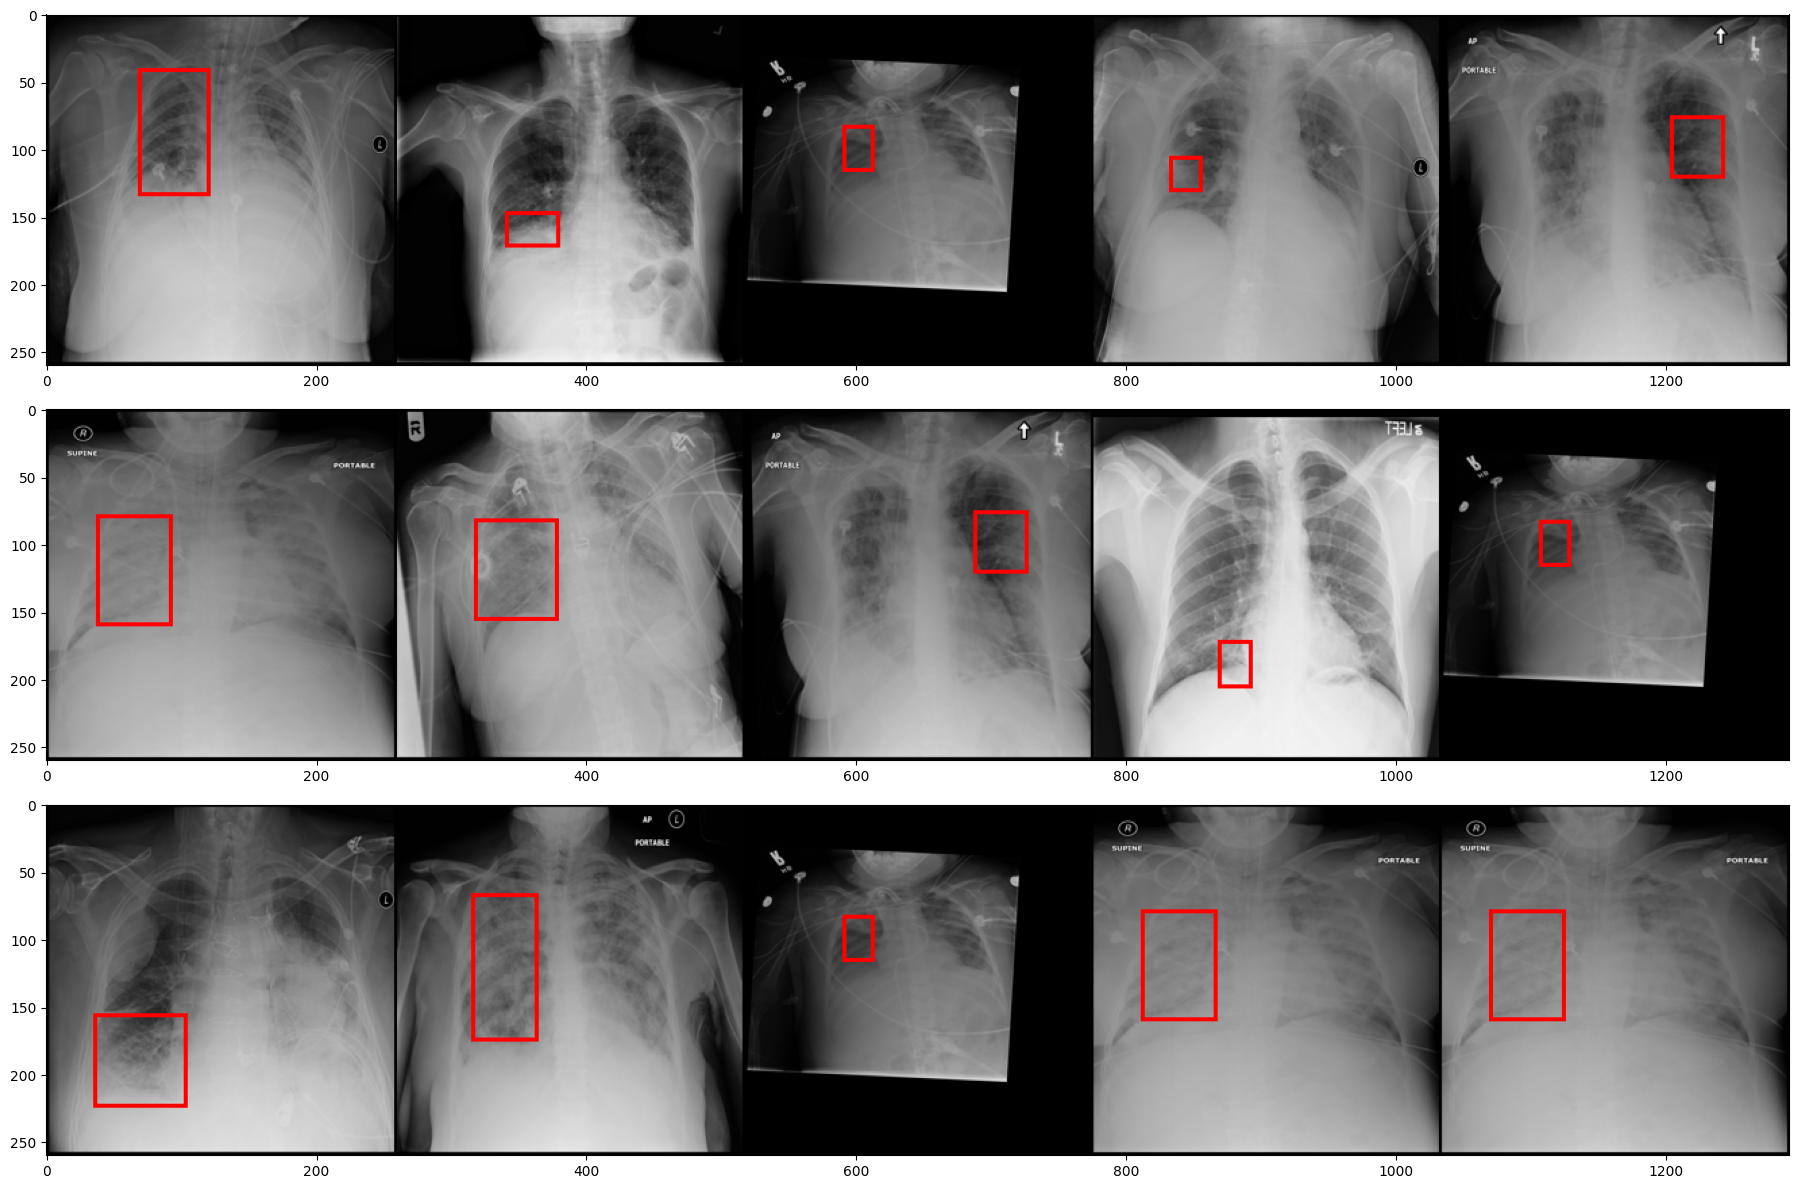

In [150]:
from torchvision.utils import draw_bounding_boxes, make_grid


def find_boxes(img_name, label_df): 
    patient_id = img_name.split(".")[0]
    boxes = label_df[label_df.patientId == patient_id]
    boxes_coord = boxes[["X0", "Y0", "X1", "Y1"]].to_numpy()
    
    return boxes_coord, boxes.area.to_numpy()


def read_images(img_names, label_df, resize):
    batch = []
    for img_name in img_names:
        img_path = os.path.join(ROOT_DIR, TRAIN_DIR, img_name)
        img = PIL.Image.fromarray(pydicom.dcmread(img_path).pixel_array).convert("RGB")
        img = img.resize(resize)
        img = np.array(img)
       
        boxes, _ = find_boxes(img_name, label_df)

        img = torch.tensor(img, dtype=torch.uint8)
        boxes = torch.tensor(boxes, dtype=torch.int32)
        batch.append((img, boxes))
    return batch


def plot_samples(batch, n_rows=3, n_cols=5, box_color="red", titles=None, box_width=3, fig_size=(20,12)):
    assert len(batch) >= n_rows * n_cols, f"Not enough samples to display, required at least {n_rows * n_cols} samples"
    fig, axs = plt.subplots(n_rows, 1, figsize=fig_size)
    fig.tight_layout()
    imgs_with_boxes = []
    for sample in batch[:n_rows * n_cols]:
        scores = None
        if len(sample) == 2:
            image, boxes = sample
        else:
            image, boxes, scores = sample 
            scores = [f"Score: {score:.2f}" for score in scores]
            
        img = draw_bounding_boxes(image=image.permute(2, 0, 1), 
                                  boxes=boxes, 
                                  colors=box_color, 
                                  labels=scores,
                                  width=box_width)
        imgs_with_boxes.append(img)
        
    for i, ax in enumerate(axs): 
        if titles:
            ax.set_title(titles[i], fontsize=18)
        img_with_boxes = make_grid(imgs_with_boxes[i * n_cols: (i + 1) * n_cols]).numpy()       
        ax.imshow(np.transpose(img_with_boxes, (1, 2, 0)))
    plt.show()
       
    
sample_batch = np.concatenate([sample_batch, np.random.choice(train_imgs, size=13)])
sample_batch = read_images(sample_batch, train_label_df, (train_img_size, train_img_size))
plot_samples(sample_batch)

In [151]:
import imgaug
from imgaug import augmenters as iaa 
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

class Augmentation:
    def __init__(self, 
                 x_translation=(-0.05, 0.05), 
                 rotate=(-5, 5),
                 scale=(0.9, 1.1),
                 noice=(0, 10),
                 blur=(0, 0.1)):
        
        self.transform = iaa.Sequential([            
            iaa.Affine(translate_percent={"x": x_translation}, scale=scale, rotate=rotate),
            iaa.AdditiveGaussianNoise(scale=noice),
            iaa.GaussianBlur(sigma=blur)])
    
    def __call__(self, image, boxes): 
        bbs = BoundingBoxesOnImage([BoundingBox(x1=box[0], y1=box[1], x2=box[2], y2=box[3]) 
                                    for box in boxes], shape=image.shape)
        
        image, bbs = self.transform(image=image, bounding_boxes=bbs)
        return image, bbs.to_xyxy_array()

    def worker_init_fn(self, worker_id):
        """Set unique seed for each worker."""
        imgaug.seed(np.random.get_state()[1][0] + worker_id)

In [152]:
from torchvision.transforms import PILToTensor, ConvertImageDtype

class PneumoniaDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms, img_names, train_img_size, labels=None):
        self.root = root
        self.transforms = transforms
        self.img_names = img_names
        self.resize = (train_img_size, train_img_size)       
        self.labels = labels
        
    def __getitem__(self, idx):
        """Load image, boxes and process them"""
        img_name = self.img_names[idx]
       
        img_path = os.path.join(self.root, self.img_names[idx])
        img = PIL.Image.fromarray(pydicom.dcmread(img_path).pixel_array).convert("RGB")
        img = img.resize(self.resize)
        img = np.array(img)
                 
        if self.labels is None:           
            return torch.tensor(img / 255.).permute(2, 0, 1).float() 
        
        boxes, area = find_boxes(img_name, self.labels)
        n_objects = len(boxes) 
        if self.transforms is not None:            
            img, boxes = self.transforms(img, boxes)
            
        img = torch.tensor(img / 255.).permute(2, 0, 1).float() 
               
        target = {}
        target["image_id"] = torch.tensor([idx])
        target["boxes"] = torch.as_tensor(boxes, dtype=torch.float32)
        target["labels"] = torch.ones(n_objects, dtype=torch.int64)
        target["area"] = torch.as_tensor(area, dtype=torch.float32)
        target["iscrowd"] = torch.zeros(n_objects, dtype=torch.int32)
        return img, target
        
    def __len__(self):
        return len(self.img_names)
    
    def collate_fn(self, batch):
        return tuple(zip(*batch))   

In [153]:
from torch.utils.data import DataLoader

augmentation = Augmentation()
train_ds = PneumoniaDataset(os.path.join(ROOT_DIR, TRAIN_DIR), augmentation, train_imgs, train_img_size, train_label_df)
valid_ds = PneumoniaDataset(os.path.join(ROOT_DIR, TRAIN_DIR), None, valid_imgs, train_img_size, train_label_df)
test_ds = PneumoniaDataset(os.path.join(ROOT_DIR, TEST_DIR), None, test_imgs, train_img_size)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=0, collate_fn=train_ds.collate_fn,  
                          worker_init_fn=augmentation.worker_init_fn)
valid_loader = DataLoader(valid_ds, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=valid_ds.collate_fn) 
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=0) 

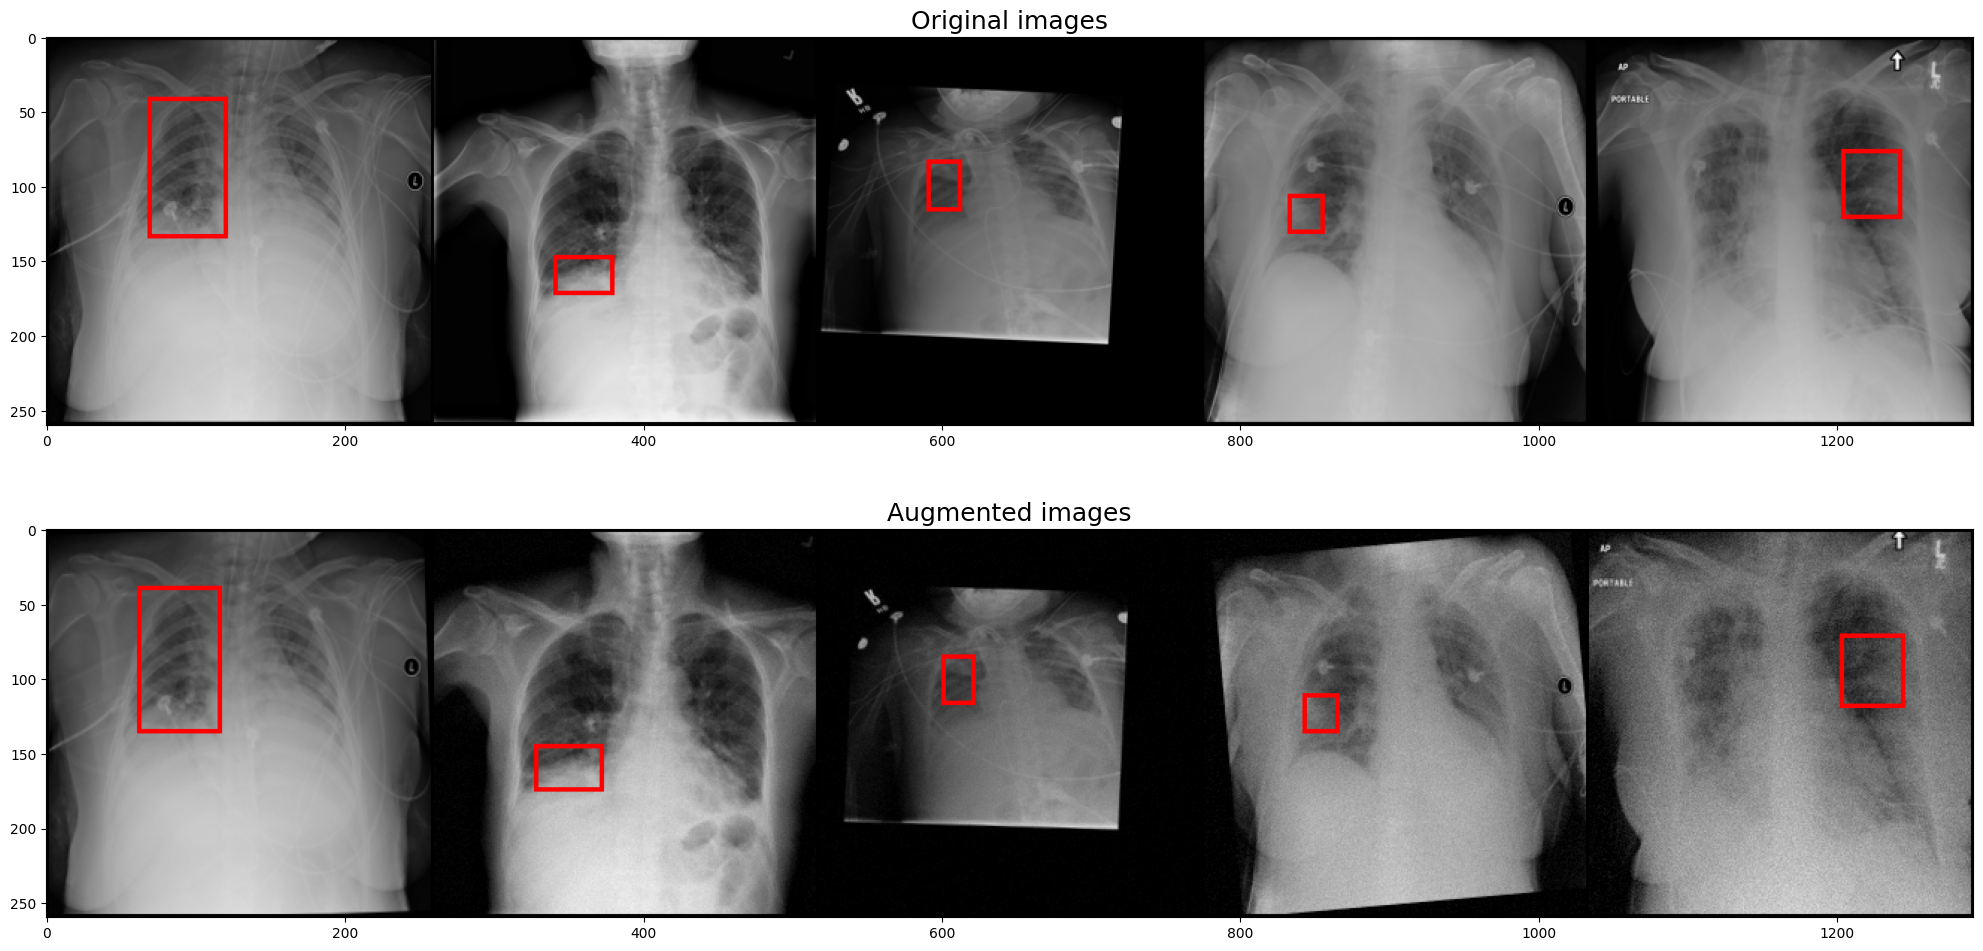

In [154]:
def process_batch(idx, sample):
    img, boxes = sample
            
    augmentation = Augmentation()
    augmentation.worker_init_fn(idx)
    img, boxes = augmentation(img.numpy(), boxes.numpy())
    img = torch.tensor(img, dtype=torch.uint8)
    boxes = torch.tensor(boxes, dtype=torch.float32)
    return img, boxes


augmented_batch = sample_batch[:5] + [process_batch(i, sample) for i, sample in enumerate(sample_batch[:5])] 
plot_samples(augmented_batch, titles=["Original images", "Augmented images"], fig_size=(20, 10), n_rows=2)
del sample_batch, augmented_batch

In [155]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:56:25.833766


### Faster RCMM Model

We will fine-tune a model trained on COCO dataset. For this purpose we have to replace model classifier with a new one adapted to our task. Our model will exploit Resnet50 as backbone. We incorporate our model into PyTorch lightning module. This way we can easily train and validate our model.

In [156]:
import pytorch_lightning as pl
from torchvision.ops import nms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor


class LitRCNN(pl.LightningModule):    
    def __init__(self, num_classes):
        super().__init__()

        model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
        in_features = model.roi_heads.box_predictor.cls_score.in_features
        model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
               
        self.model = model
        
    def forward(self, x):
        self.model.eval()
        
        outputs =  self.model(x)
        
        preds = []
        for output in outputs:       
            boxes = output["boxes"]
            scores = output["scores"]
            idx = nms(boxes,scores, 0.05)
            preds.append({"boxes": boxes[idx].cpu().detach().numpy(), "scores": scores[idx].cpu().detach().numpy()})
        
        return preds
        
    def training_step(self, batch, batch_idx):   
        images, targets = batch   
               
        losses = self.model(images, targets)  
      
        loss = sum(loss for loss in losses.values())        
        self.log_losses(loss, losses)   
        
        return loss
    
    def validation_step(self, batch, batch_idx):     
        self.model.train()
        
        images, targets = batch 
        losses = self.model(images, targets)
      
        loss = sum(loss for loss in losses.values())   
        self.log_losses(loss, losses, mode="val")
        
    def predict_step(self, batch, batch_idx):   
        return self.forward(batch)    
       
    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(),  lr=0.005, momentum=0.9, weight_decay=0.0005)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.3)
        
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,  
                "interval": "epoch",
                "frequency": 1}}
    
    def log_losses(self, loss, losses, mode="train"): 
        self.log_dict({f"{mode}_loss": loss,                   
                       f"{mode}_loss_box_reg": losses['loss_box_reg'],
                       f"{mode}_loss_objectness": losses['loss_objectness'],
                       f"{mode}_loss_rpn_box_reg": losses['loss_rpn_box_reg']}, on_step=False, on_epoch=True, batch_size=batch_size)

model = LitRCNN(num_classes)

In [157]:
from pytorch_lightning import Callback
from pytorch_lightning.callbacks import ModelCheckpoint


class MetricsCallback(Callback):
    """PyTorch Lightning metric callback."""

    def __init__(self, metrics):
        super().__init__()
        self.metrics = metrics      
        self.training = {}
        self.validations = {}
        
    def on_train_epoch_end(self, trainer, pl_module):
        self.training[trainer.current_epoch] = {metric: trainer.callback_metrics["train_" + metric] for metric in self.metrics}

    def on_validation_end(self, trainer, pl_module):        
        self.validations[trainer.current_epoch] = {metric: trainer.callback_metrics["val_" + metric] for metric in self.metrics}
        

checkpoint_callback = ModelCheckpoint(dirpath='checkpoints',
                                      filename='{epoch}-{val_loss:.4f}',
                                      every_n_epochs=1,
                                      monitor='val_loss',
                                      save_top_k=1,
                                      mode='min')

callbacks = [MetricsCallback(["loss"] + rcnn_losses), checkpoint_callback]

### Training the model model_LiteRCNN

In [158]:
device = "gpu" if torch.cuda.is_available() else "cpu"
trainer = pl.Trainer(accelerator=device, max_epochs=2, callbacks=callbacks) 
trainer.fit(model=model, train_dataloaders=train_loader, val_dataloaders=valid_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type       | Params | Mode 
---------------------------------------------
0 | model | FasterRCNN | 41.3 M | train
---------------------------------------------
41.1 M    Trainable params
222 K     Non-trainable params
41.3 M    Total params
165.197   Total estimated model params size (MB)
189       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [159]:
model = LitRCNN.load_from_checkpoint(trainer.checkpoint_callback.best_model_path, num_classes=num_classes)
print(trainer.checkpoint_callback.best_model_path)

C:\Users\vivek\vd_jupyter\Projects\capstone\checkpoints\epoch=1-val_loss=0.2739.ckpt


### Evaluation or validaiton of Model (We used only 20 input sample  if we use full sample , result and evalautop will be more better.

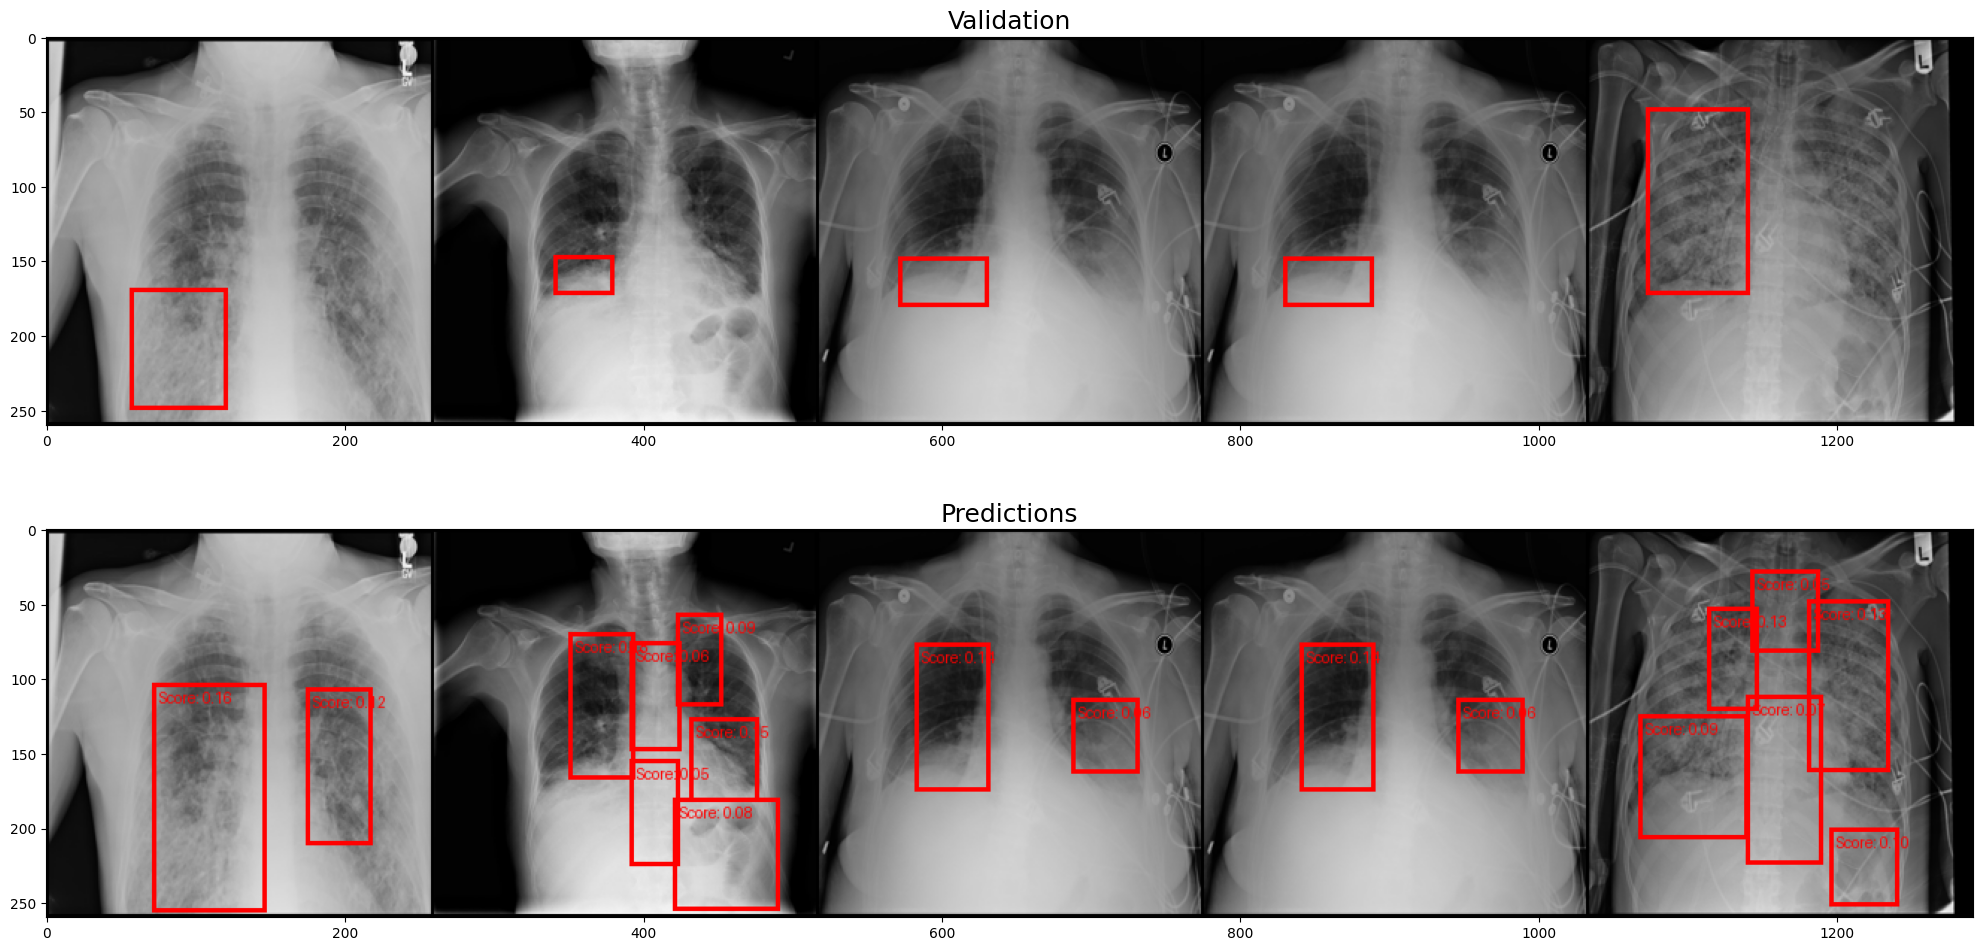

In [160]:
sample_batch_idx = np.random.choice(len(valid_imgs), size=5)
sample_batch = read_images(np.array(valid_ds.img_names)[sample_batch_idx], train_label_df, (train_img_size, train_img_size))

preds = model([valid_ds[i][0] for i in sample_batch_idx])
for i, pred in enumerate(preds):
    sample_batch.append((sample_batch[i][0], 
                         torch.tensor(pred["boxes"], dtype=torch.int32),
                         pred["scores"]))
    
plot_samples(sample_batch, titles=["Validation", "Predictions"], fig_size=(20, 10), n_rows=2)

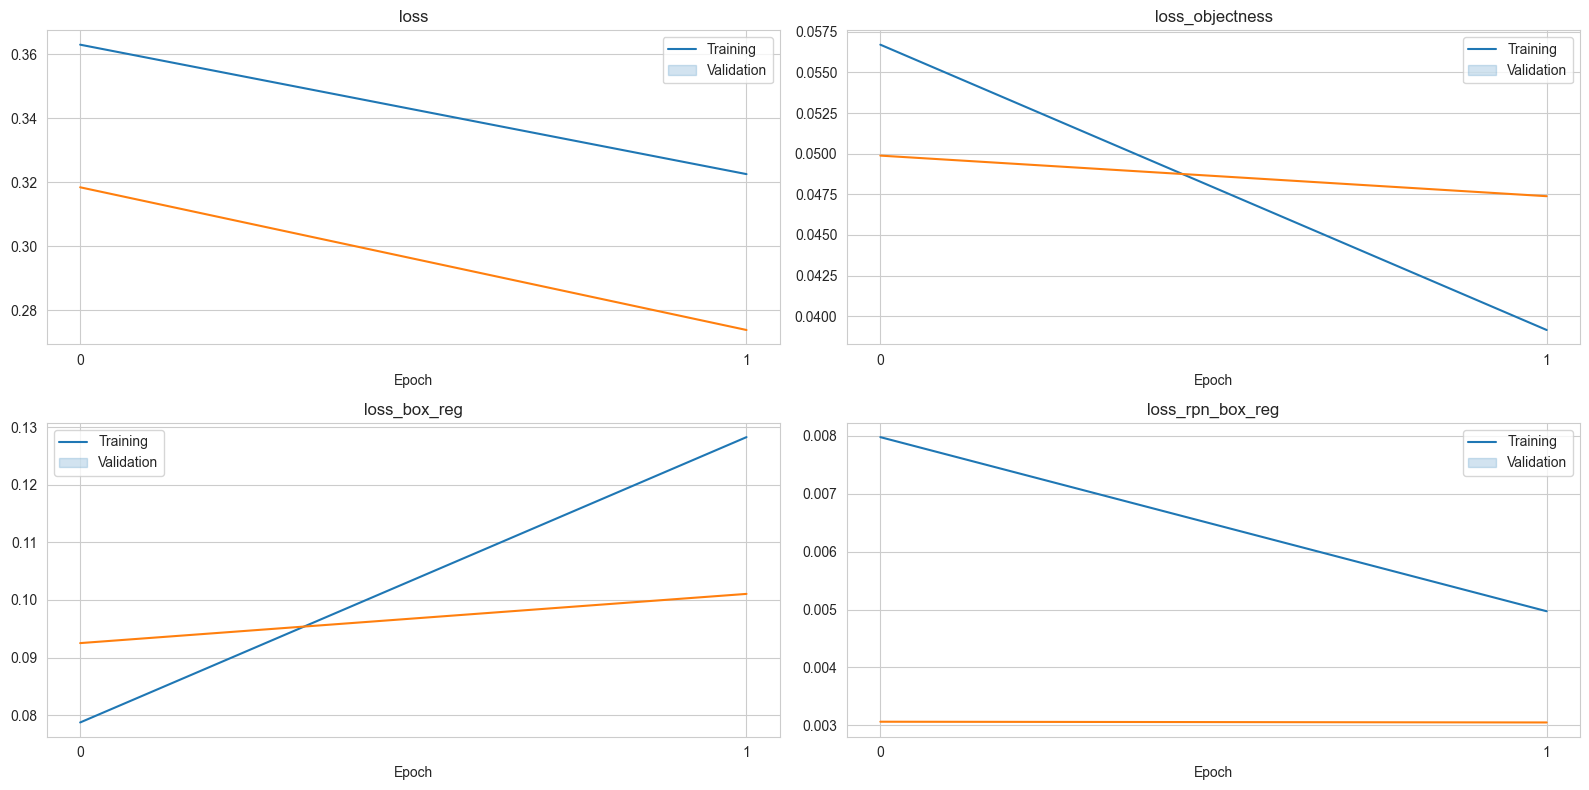

In [161]:
sns.set_style("whitegrid")
training = pd.DataFrame.from_dict(callbacks[0].training, orient="index").applymap(lambda x: x.cpu().numpy())
validations = pd.DataFrame.from_dict(callbacks[0].validations, orient="index").applymap(lambda x: x.cpu().numpy())
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

for ax, metric in zip(axs.flat, callbacks[0].metrics):    
    ax.set_title(metric)
    
    g = sns.lineplot(data=training, x=training.index, y=metric, ax=ax)
    g = sns.lineplot(data=validations, x=validations.index, y=metric, ax=ax)
    g.set(xlabel="Epoch", ylabel=None)
    g.set_xticks(training.index)
    ax.legend(labels=["Training","Validation"])
  
fig.tight_layout()
plt.show()

In [162]:
history = trainer.validate(model, dataloaders=valid_loader, verbose=False)
pd.DataFrame(history, index=["Validation"]).T

Validation: |          | 0/? [00:00<?, ?it/s]

Validation
val_loss                0.278417
val_loss_box_reg        0.101045
val_loss_objectness     0.052317
val_loss_rpn_box_reg    0.003051

In [163]:
preds = trainer.predict(model, test_loader)

outputs = []
for batch_pred in preds:
    for sample_pred in batch_pred:
        scores, boxes = sample_pred["scores"], sample_pred["boxes"]
        if len(scores) == 0:
            outputs.append(np.nan)
        else:
            label = ""
            boxes = boxes / scale_factor
            for score, box in zip(scores, boxes):            
                label += f"{score:.2f} {box[0]:.1f} {box[1]:.1f} {(box[2]-box[0]):.1f} {(box[3]-box[1]):.1f} "
            outputs.append(label.strip())
    
submission = pd.read_csv(os.path.join(ROOT_DIR, SUBMISSION_FILE))
submission.PredictionString = outputs
submission.to_csv("submission_Outfile_20.csv", header=True, index=False)
submission

Predicting: |          | 0/? [00:00<?, ?it/s]

patientId    x    y  width  height  Target
0   00436515-870c-4b36-a041-de91049b9ab4  264  152    213     379       1
1   00704310-78a8-4b38-8475-49f4573b2dbb  323  577    160     104       1
2   00aecb01-a116-45a2-956c-08d2fa55433f  288  322     94     135       1
3   00c0b293-48e7-4e16-ac76-9269ba535a62  306  544    168     244       1
4   00f08de1-517e-4652-a04f-d1dc9ee48593  181  184    206     506       1
5   0100515c-5204-4f31-98e0-f35e4b00004a  703  416     84      77       1
6   010ccb9f-6d46-4380-af11-84f87397a1b8  652  437    161     293       1
7   012a5620-d082-4bb8-9b3b-e72d8938000c  133  613    275     275       1
8   0174c4bb-28f5-41e3-a13f-a396badc18bd  155  182    273     501       1
9   019d950b-dd38-4cf3-a686-527a75728be6  229  318    250     301       1
10  01a6eaa6-222f-4ea8-9874-bbd89dc1a1ce  141  306    225     327       1
11  01a7353d-25bb-4ff8-916b-f50dd541dccf  214  582    239     133       1
12  01adfd2f-7bc7-4cef-ab68-a0992752b620  225  415     98     101       1
13  01b9e362-4950-40f5-88fa-7557ac2a45bb  366  289    208     527       1
14  01be392f-a46d-4aef-a57e-9cd1a80dd47e  535  626    177     240       1
15  01cad8d0-45cd-4603-b099-94055d322310  218  667    258     324       1
16  01cd2ba5-2baf-44b2-bf15-ee57e1ea4599  664  380    141     330       1
17  01d4fa0f-97a0-4522-b0d8-134400db2a3e  222  258    194     436       1
18  01dc817c-3cfa-49fe-8662-518edc30652a  368  677    101     139       1
19  01f3abc2-33c7-4ea2-a599-dc49b76fcfae  676  292    163     186       1
20  01fa0f5e-00c3-41cb-b5c7-10600c8633ae  602  438    101     101       1
21  01fdfd88-7607-48b9-ba05-a36e8b6fd19b  319  437    170     289       1

Faster RCNN Pickle

In [164]:
# Save the model
torch.save(model, 'fasterrcnn_model.pth')

In [165]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:59:24.884140


## Conclusion

### MileStone 1:-

 This project explored the effectiveness of transfer learning for pneumonia detection using chest X-ray images. Three pre-trained CNN architectures (VGG16, MobileNetV2, and ResNet50) were fine-tuned and evaluated against a baseline model.  The results indicate that transfer learning significantly improved the classification performance of all three models compared to their initial fine-tuning, achieving higher test accuracies.

  The comparative analysis suggests that [mention which model performed best and any significant differences].  Further research could explore data augmentation techniques and more sophisticated model architectures to potentially enhance accuracy and robustness.
  
  
### MileStone 2:-
First we used RCNN to find the Bounding box, IOC and max region and did prediction and compared the prediction with actual validation. For Hybrid, we used Faster Rcnn and created a model, Trained and validated the Model. For both RCNN and Faster RCNN we used subset of data as using 30K images take lot of time and resources for execution.

In [166]:
printCurrentDateTime();

Current Date and Time: 2024-12-15 15:59:24.888007
